In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from astropy.io import ascii
import datetime 
from astropy.time import Time
from extinction import ccm89, apply, remove

In [25]:
#importing the table of salt2 paramteers 

table = pd.read_csv(r"C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\tables\ztfdr2_salt2_params.csv")
table

ztfname         z            t0        x0        x1         c  \
0     ZTF17aadlxmv  0.062019  58878.085277  0.001126  0.459966  0.062074   
1     ZTF18aaadqua  0.078672  58130.731644  0.000845  4.999990 -0.394820   
2     ZTF18aaanzph  0.063718  58138.014461  0.000275 -1.224903  0.567260   
3     ZTF18aaapivw  0.026341  58152.876201  0.001112 -4.999999  0.590521   
4     ZTF18aaaqexr  0.070258  58893.687923  0.000610 -1.437246  0.048229   
...            ...       ...           ...       ...       ...       ...   
3623  ZTF18acrxnme  0.078210  58459.559673  0.000720 -0.820927 -0.125119   
3624  ZTF18aczeraq  0.058635  58483.107214  0.000913  0.985630  0.088372   
3625  ZTF20aciwcuz  0.061217  59190.000000  0.004948  5.000000 -0.352244   
3626  ZTF19acdtmwh  0.069910  58774.273070  0.000468 -0.264331  0.199896   
3627  ZTF20aatvdwr  0.036318  58945.121622  0.005931  2.264104  0.136763   

         mwebv  mwr_v  z_err     t0_err  ...      cov_x1_c        fitprob  \
0     0.033335    3.1    0.0   0.219280  ... -1.376858e-04   1.783531e-01   
1     0.041784    3.1    0.0  14.727339  ... -1.506320e-04   1.279725e-01   
2     0.016149    3.1    0.0   8.873781  ... -2.795659e-01   5.768953e-01   
3     0.087685    3.1    0.0   0.971177  ...  9.415107e-07   2.487972e-01   
4     0.031559    3.1    0.0   0.170907  ...  1.167888e-03   3.832250e-02   
...        ...    ...    ...        ...  ...           ...            ...   
3623  0.029261    3.1    0.0   0.271434  ...  3.449116e-03   6.333516e-02   
3624  0.013491    3.1    0.0   0.243003  ...  1.704005e-03   2.260308e-01   
3625  0.027364    3.1    0.0   0.037735  ... -1.515679e-10  3.076027e-240   
3626  0.027364    3.1    0.0   0.231173  ...  7.713955e-03   1.074442e-01   
3627  0.027364    3.1    0.0   0.302343  ... -1.430254e-03   8.666186e-09   

      lccoverage_flag  fitquality_flag  frac_fitted  peak_mag_ztfg  \
0                   1                1   100.000000      17.932858   
1                   0                0   100.000000      18.332437   
2                   0                0   100.000000      19.235371   
3                   0                0   100.000000      17.699966   
4                   1                1   100.000000      18.600259   
...               ...              ...          ...            ...   
3623                1                1   100.000000      18.491623   
3624                1                1   100.000000      18.149749   
3625                0                0    74.545455      16.397405   
3626                1                1   100.000000      18.827481   
3627                1                0   100.000000      16.094808   

      peak_mag_ztfr  peak_mag_obs  bts_event  phot_version  
0         18.017016     17.907353          1     2022dec05  
1         19.084107     18.261429          0     2022dec19  
2         18.713633     19.259291          0     2022dec05  
3         17.066553     17.573609          0     2023jul25  
4         18.659154     18.406466          1     2022dec05  
...             ...           ...        ...           ...  
3623      18.763145     18.673389          1     2022dec05  
3624      18.216452     18.024513          1     2022dec05  
3625      17.100409     17.504602          0     2023jan01  
3626      18.738999     18.631764          1     2023jul25  
3627      16.139610     16.124504          0     2023jul25  

[3628 rows x 30 columns]

In [26]:
#plucking out the arrays I want because I don't know how pandas dataframes work

ztfname = np.array(table['ztfname'])
z = np.array(table['z'])
z_err = np.array(table['z_err'])
x1 = np.array(table['x1'])
x1_err = np.array(table['x1_err'])
t0 = np.array(table['t0'])
t0_err = np.array(table['t0_err'])
mwebv = np.array(table['mwebv'])
mwebv_err = np.array(table['mwebv_err'])
#checking how many sn there are in the table
print(len(ztfname))
#print(ztfname)
#print(t0)

3628


From here we have info taken from the file names themselves

In [27]:
all_spectra=listdir(r"C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\spectra")    #gets all the spectrum file names and puts them all into a list
#print(all_spectra[0:5])
del all_spectra[0:4]                    #remove the first few useless entries
#print(all_spectra[0:5])

date_of_spectra = []
ztfname_from_file = []
for i in all_spectra:
    if "_" not in i[13:21]:                         #the last 6 files have slightly differnt file name formats which messes up the rest of the operations so I'm just going to excule those
        date_of_spectra.append(i[13:21])            #pulls out the date part of the spuernova file name
        ztfname_from_file.append(i[0:12])           #pulls out the name part of the supernova file name
#date_of_spectra = np.array(date_of_spectra)

#for i in range(len(all_spectra)):                  #checking the position of the discarded files
#    if '_' in all_spectra[i][13:21]:
#        print(i)

for i in range(6):
    all_spectra.pop()                               #removes the last entry in the list 6 times to remove these discarded files



print(len(date_of_spectra), date_of_spectra)            #checking that everything is the same length and that the entries corespond 
print(len(ztfname_from_file), ztfname_from_file)
print(len(all_spectra), all_spectra)

mjd_of_spectra = []
for i in date_of_spectra:
    t = datetime.datetime( int(i[0:4]), int(i[4:6]), int(i[6:8]) )    #turns the date from yyyymmdd to someting it can recognise
    t = Time(t)
    mjd_of_spectra.append(t.mjd)                                      #turns the dates into mjd
print(len(mjd_of_spectra),mjd_of_spectra)

5210 ['20200123', '20180122', '20180122', '20180122', '20180124', '20180225', '20200215', '20200220', '20180216', '20180216', '20180221', '20180221', '20181109', '20180228', '20180307', '20180309', '20180309', '20180307', '20180307', '20180322', '20180226', '20180307', '20180320', '20180309', '20180321', '20180304', '20180309', '20180310', '20191031', '20180310', '20180321', '20180321', '20180410', '20200208', '20181104', '20190212', '20180324', '20180324', '20180329', '20180324', '20180308', '20180324', '20180329', '20180410', '20180328', '20180328', '20180402', '20180410', '20180410', '20180410', '20180410', '20200507', '20200518', '20200522', '20200527', '20180408', '20201224', '20180513', '20180517', '20180410', '20180412', '20180410', '20180415', '20180410', '20180408', '20180421', '20180421', '20180410', '20180414', '20180421', '20180422', '20180409', '20180411', '20180412', '20180421', '20180418', '20180428', '20180421', '20180411', '20180415', '20180426', '20180411', '20180426'

In [28]:
#just a separte method to work out the mjd. Both methods work except I tried this one before I realised my redefintion mistake and couldnt figure out why it wasnt working.
mjd_of_spectra = []
for i in date_of_spectra:
    date = i[0:4] + '-' + i[4:6] + '-' + i[6:8]
    t = Time(date)
    mjd_of_spectra.append(t.mjd)

In [29]:
#creating a table of everthing gathered from the file names themselves

files = { 'File name':all_spectra, 'ztfname':ztfname_from_file, 'Date of spectrum':date_of_spectra, 'MJD of spectrum':mjd_of_spectra}

file_info = pd.DataFrame(files)
file_info

File name       ztfname Date of spectrum  \
0        ZTF17aadlxmv_20200123_SEDm_0.ascii  ZTF17aadlxmv         20200123   
1        ZTF18aaadqua_20180122_P200_0.ascii  ZTF18aaadqua         20180122   
2        ZTF18aaajrso_20180122_P200_0.ascii  ZTF18aaajrso         20180122   
3        ZTF18aaanzph_20180122_P200_0.ascii  ZTF18aaanzph         20180122   
4     ZTF18aaanzph_20180124_Lick-3m_0.ascii  ZTF18aaanzph         20180124   
...                                     ...           ...              ...   
5205     ZTF21aaabviz_20210110_SEDm_0.ascii  ZTF21aaabviz         20210110   
5206     ZTF21aaabvkj_20210108_SEDm_0.ascii  ZTF21aaabvkj         20210108   
5207     ZTF21aaabxln_20210108_SEDm_0.ascii  ZTF21aaabxln         20210108   
5208     ZTF21aalkjbl_20210227_SEDm_0.ascii  ZTF21aalkjbl         20210227   
5209     ZTF21aalkjbl_20210303_SEDm_0.ascii  ZTF21aalkjbl         20210303   

      MJD of spectrum  
0             58871.0  
1             58140.0  
2             58140.0  
3             58140.0  
4             58142.0  
...               ...  
5205          59224.0  
5206          59222.0  
5207          59222.0  
5208          59272.0  
5209          59276.0  

[5210 rows x 4 columns]

Back to working with the original parameter table data

In [30]:
def cut_function(arr,cut_parameter,cut):
    """
    Takes an input array and creates a new list containing only the values that correspond to values where
    the cut parameter is as low as required
    """
    list = []
    for i in range(len(cut_parameter)):
        if cut_parameter[i] <= cut:
            list.append(arr[i]) 
    return list


#changing the arrays into lists that only contain values for when x1 <= -1.5
x1_cut = -1.5
ztfname = cut_function(ztfname,x1,x1_cut)
z = cut_function(z,x1,x1_cut)
z_err = cut_function(z_err,x1,x1_cut)
#x1 = cut_function(x1,x1,x1_cut)
x1_err = cut_function(x1_err,x1,x1_cut)
t0 = cut_function(t0,x1,x1_cut)
t0_err = cut_function(t0_err,x1,x1_cut)
mwebv = cut_function(mwebv,x1,x1_cut)
mwebv_err = cut_function(mwebv_err,x1,x1_cut)
x1 = cut_function(x1,x1,x1_cut)                         #be careful to have this at the bottom so that the redefinition doesn't mess with the rest

#again jsut making sure that everthing is the same lenght meaning all the entries corespond
print(len(ztfname),len(z),len(z_err),len(x1),len(x1_err),len(t0),len(t0_err),len(mwebv),len(mwebv_err),max(x1))
print(ztfname)
print(t0)

503 503 503 503 503 503 503 503 503 -1.50182063
['ZTF18aaapivw', 'ZTF18aabstmw', 'ZTF18aabtiph', 'ZTF18aabyhlc', 'ZTF18aagtcxj', 'ZTF18aahfbqp', 'ZTF18aahfgyz', 'ZTF18aahjaxz', 'ZTF18aahpzhc', 'ZTF18aaifxvz', 'ZTF18aaimxdx', 'ZTF18aaixjrc', 'ZTF18aajnrgu', 'ZTF18aajtlbf', 'ZTF18aakglgw', 'ZTF18aamsgjq', 'ZTF18aangpkx', 'ZTF18aaobjwr', 'ZTF18aaodrgt', 'ZTF18aaoxrup', 'ZTF18aapqwyv', 'ZTF18aaqeasu', 'ZTF18aaqgadq', 'ZTF18aaqpkvx', 'ZTF18aarbaba', 'ZTF18aarcypa', 'ZTF18aarikzk', 'ZTF18aaroihe', 'ZTF18aasprui', 'ZTF18aasrsst', 'ZTF18aauizcr', 'ZTF18aavniyw', 'ZTF18aavrmlf', 'ZTF18aavsilo', 'ZTF18aaxdrjn', 'ZTF18aaxrabr', 'ZTF18aaykmzg', 'ZTF18aayxupv', 'ZTF18aazblzy', 'ZTF18aazgfkq', 'ZTF18aazhwnh', 'ZTF18aazixbw', 'ZTF18aazxdyy', 'ZTF18abbikrz', 'ZTF18abbvsiv', 'ZTF18abclfee', 'ZTF18abdgwxn', 'ZTF18abdmgab', 'ZTF18abeegsl', 'ZTF18abetejo', 'ZTF18abfdupq', 'ZTF18abhgrff', 'ZTF18abixkdo', 'ZTF18abjrznx', 'ZTF18abklaoj', 'ZTF18ablqhqx', 'ZTF18abltaxf', 'ZTF18abltdfj', 'ZTF18ablwtkf', 'ZTF18a

Now working with both sets of data

In [31]:
parameters  = { 'ztfname':ztfname, 'z':z, 'z_err':z_err, 'x1':x1, 'x1_err':x1_err, 't0':t0, 't0_err':t0_err, 'mwebv':mwebv, 'mwebv_err':mwebv_err}
new_table = pd.DataFrame(parameters)  #creating a new table with only the parameters I need and after the x1 cut has been applied

noOfLinks = []
for name in ztfname:                             #checking how many spectrum files each SN has
    a = 0
    for link in range(len(all_spectra)):
        if all_spectra[link].find(name) == 0:
            a += 1
    noOfLinks.append(a)
print(len(noOfLinks), max(noOfLinks))

new_table.insert(1, "Number of spectra", noOfLinks)     #adding the number of spectra to the table
new_table

503 7


ztfname  Number of spectra         z  z_err        x1    x1_err  \
0    ZTF18aaapivw                  1  0.026341    0.0 -4.999999  2.255409   
1    ZTF18aabstmw                  3  0.023086    0.0 -1.527619  0.110240   
2    ZTF18aabtiph                  2  0.035974    0.0 -2.373979  0.178352   
3    ZTF18aabyhlc                  1  0.029055    0.0 -2.747574  0.091428   
4    ZTF18aagtcxj                  2  0.032359    0.0 -1.883614  0.046484   
..            ...                ...       ...    ...       ...       ...   
498  ZTF20acymtbr                  1  0.061076    0.0 -5.000000  0.898005   
499  ZTF20acynjjo                  3  0.015873    0.0 -2.156344  0.796144   
500  ZTF20acynlkj                  1  0.055010    0.0 -2.295968  0.429095   
501  ZTF20acyybwo                  1  0.071356    0.0 -1.956481  0.278034   
502   ZUDS20dlgrv                  0  0.217717    0.0 -2.149500  0.347482   

               t0    t0_err     mwebv  mwebv_err  
0    58152.876201  0.971177  0.087685        0.0  
1    58190.750251  0.103113  0.011197        0.0  
2    58178.670281  0.402663  0.018811        0.0  
3    58180.621262  0.504143  0.011581        0.0  
4    58213.950331  0.043565  0.010263        0.0  
..            ...       ...       ...        ...  
498  59199.059171  0.592376  0.017637        0.0  
499  59216.656929  0.433611  0.113833        0.0  
500  59210.393921  0.189293  0.018844        0.0  
501  59209.929450  0.199394  0.010385        0.0  
502  58888.894567  0.220167  0.006524        0.0  

[503 rows x 10 columns]

In [32]:
print(ztfname)
print(ztfname_from_file)

['ZTF18aaapivw', 'ZTF18aabstmw', 'ZTF18aabtiph', 'ZTF18aabyhlc', 'ZTF18aagtcxj', 'ZTF18aahfbqp', 'ZTF18aahfgyz', 'ZTF18aahjaxz', 'ZTF18aahpzhc', 'ZTF18aaifxvz', 'ZTF18aaimxdx', 'ZTF18aaixjrc', 'ZTF18aajnrgu', 'ZTF18aajtlbf', 'ZTF18aakglgw', 'ZTF18aamsgjq', 'ZTF18aangpkx', 'ZTF18aaobjwr', 'ZTF18aaodrgt', 'ZTF18aaoxrup', 'ZTF18aapqwyv', 'ZTF18aaqeasu', 'ZTF18aaqgadq', 'ZTF18aaqpkvx', 'ZTF18aarbaba', 'ZTF18aarcypa', 'ZTF18aarikzk', 'ZTF18aaroihe', 'ZTF18aasprui', 'ZTF18aasrsst', 'ZTF18aauizcr', 'ZTF18aavniyw', 'ZTF18aavrmlf', 'ZTF18aavsilo', 'ZTF18aaxdrjn', 'ZTF18aaxrabr', 'ZTF18aaykmzg', 'ZTF18aayxupv', 'ZTF18aazblzy', 'ZTF18aazgfkq', 'ZTF18aazhwnh', 'ZTF18aazixbw', 'ZTF18aazxdyy', 'ZTF18abbikrz', 'ZTF18abbvsiv', 'ZTF18abclfee', 'ZTF18abdgwxn', 'ZTF18abdmgab', 'ZTF18abeegsl', 'ZTF18abetejo', 'ZTF18abfdupq', 'ZTF18abhgrff', 'ZTF18abixkdo', 'ZTF18abjrznx', 'ZTF18abklaoj', 'ZTF18ablqhqx', 'ZTF18abltaxf', 'ZTF18abltdfj', 'ZTF18ablwtkf', 'ZTF18abmjcbs', 'ZTF18abmjvuf', 'ZTF18abmrhom', 'ZTF18a

Importing data from a third location just to have a a record of the SNe types

In [33]:
#creating anther table that contains the SN classification type and sub type

categories = pd.read_csv(r'C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\tables\ztfdr2_classifications.csv')
ztfname_categories = np.array(categories['ztfname'])
sn_type = np.array(categories['sn_type'])
sub_type = np.array(categories['sub_type'])
categories

ztfname     sn_type sub_type
0     ZTF17aadlxmv  snia-cosmo     norm
1     ZTF18aaadqua    snia-pec     03fg
2     ZTF18aaanzph  snia-cosmo     norm
3     ZTF18aaapivw  snia-cosmo     norm
4     ZTF18aaaqexr        snia      NaN
...            ...         ...      ...
3623  ZTF18acrxnme  snia-cosmo     norm
3624  ZTF18aczeraq  snia-cosmo     norm
3625  ZTF20aciwcuz    snia-pec      csm
3626  ZTF19acdtmwh        snia      NaN
3627  ZTF20aatvdwr    snia-pec     03fg

[3628 rows x 3 columns]

The next 2 cells makes sure that all the data corresponds together

In [34]:
#this cell dubles up on all the respective entries that corespond to supernova that have more that one recorded spectrum 
#so 2 separate file name entries that correspond to the same SN will have the same values in the corresponding parameter lists

ztfname_duplicate = []
t0_duplicate = []
t0_duplicate_err = []
z_duplicate = []
z_duplicate_err = []
x1_duplicate = []
x1_duplicate_err = []
mwebv_duplicate = []
mwebv_duplicate_err = []
files_x1_cut = []
dates_x1_cut = []
mjd_x1_cut = []

for i in range(len(ztfname_from_file)):
    for j in range(len(ztfname)):
        if ztfname_from_file[i] == ztfname[j]:              #if that name taken from the two differnet places are equal 
            ztfname_duplicate.append(ztfname[j])            #then add that corresponding entry to it's respective list
            t0_duplicate.append(t0[j])
            t0_duplicate_err.append(t0_err[j])
            z_duplicate.append(z[j])
            z_duplicate_err.append(z_err[j])
            x1_duplicate.append(x1[j])
            x1_duplicate_err.append(x1_err[j])
            mwebv_duplicate.append(mwebv[j])
            mwebv_duplicate_err.append(mwebv_err[j])
            files_x1_cut.append(all_spectra[i])
            dates_x1_cut.append(date_of_spectra[i])
            mjd_x1_cut.append(mjd_of_spectra[i])


print(len(ztfname_duplicate), ztfname_duplicate)
print(len(ztfname),ztfname)

690 ['ZTF18aaapivw', 'ZTF18aabstmw', 'ZTF18aabstmw', 'ZTF18aabstmw', 'ZTF18aabtiph', 'ZTF18aabtiph', 'ZTF18aabyhlc', 'ZTF18aagtcxj', 'ZTF18aagtcxj', 'ZTF18aahfbqp', 'ZTF18aahfgyz', 'ZTF18aahfgyz', 'ZTF18aahjaxz', 'ZTF18aahjaxz', 'ZTF18aahpzhc', 'ZTF18aaifxvz', 'ZTF18aaimxdx', 'ZTF18aaimxdx', 'ZTF18aaixjrc', 'ZTF18aajnrgu', 'ZTF18aajtlbf', 'ZTF18aajtlbf', 'ZTF18aakglgw', 'ZTF18aamsgjq', 'ZTF18aangpkx', 'ZTF18aaobjwr', 'ZTF18aaodrgt', 'ZTF18aaoxrup', 'ZTF18aapqwyv', 'ZTF18aapqwyv', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqeasu', 'ZTF18aaqgadq', 'ZTF18aaqgadq', 'ZTF18aaqpkvx', 'ZTF18aarbaba', 'ZTF18aarbaba', 'ZTF18aarbaba', 'ZTF18aarcypa', 'ZTF18aarcypa', 'ZTF18aarcypa', 'ZTF18aarikzk', 'ZTF18aaroihe', 'ZTF18aaroihe', 'ZTF18aasprui', 'ZTF18aasprui', 'ZTF18aasrsst', 'ZTF18aauizcr', 'ZTF18aauizcr', 'ZTF18aauizcr', 'ZTF18aavniyw', 'ZTF18aavrmlf', 'ZTF18aavsilo', 'ZTF18aaxdrjn', 'ZTF18aaxdrjn', 'ZTF18aaxrabr', 'ZTF18aaykmzg', 'ZT

In [35]:
#performing the same function as the previous cell but this is segrategated as the data might not have been in the same order and now we can be sure it is

sn_type_x1_cut = []
sub_type_x1_cut = []
for i in range(len(ztfname_duplicate)):
    for j in range(len(ztfname_categories)):
        if ztfname_duplicate[i] == ztfname_categories[j]:
            sn_type_x1_cut.append(sn_type[j])
            sub_type_x1_cut.append(sub_type[j])

print(len(sub_type_x1_cut),len(sn_type_x1_cut))

690 690


In [36]:
#calculating the phase of each recorded spectrum from the mjd of the sprectrum and the mjd of peak light
phase = np.array(mjd_x1_cut) - np.array(t0_duplicate)

In [37]:
#just another interim table containing all the data after just the x1 cut but not the phase cut

all_info_x1_cut = {'ztfname':ztfname_duplicate, 'File Name':files_x1_cut, 'Date of spectrum':dates_x1_cut, 'MJD of spectrum':mjd_x1_cut, 't0':t0_duplicate, 'Phase of spectrum':phase,'t0_err':t0_duplicate_err, 'z':z_duplicate, 'z_err':z_duplicate_err, 'x1':x1_duplicate, 'x1_err':x1_duplicate_err, 'MWEBV':mwebv_duplicate, 'MWEBV_err':mwebv_duplicate_err, 'SN Type':sn_type_x1_cut, 'SN Sub Type':sub_type_x1_cut}
all_info_table_x1_cut = pd.DataFrame(all_info_x1_cut)
all_info_table_x1_cut

ztfname                                 File Name Date of spectrum  \
0    ZTF18aaapivw        ZTF18aaapivw_20180225_SEDm_0.ascii         20180225   
1    ZTF18aabstmw  ZTF18aabstmw_20180307_LCO-FLOYDS_0.ascii         20180307   
2    ZTF18aabstmw        ZTF18aabstmw_20180307_SEDm_0.ascii         20180307   
3    ZTF18aabstmw         ZTF18aabstmw_20180322_APO_0.ascii         20180322   
4    ZTF18aabtiph     ZTF18aabtiph_20180304_MDM-2.4_0.ascii         20180304   
..            ...                                       ...              ...   
685  ZTF20acynjjo    ZTF20acynjjo_20201222_CMO-2.5m_0.ascii         20201222   
686  ZTF20acynjjo        ZTF20acynjjo_20201222_SEDm_0.ascii         20201222   
687  ZTF20acynjjo        ZTF20acynjjo_20210115_SEDm_0.ascii         20210115   
688  ZTF20acynlkj  ZTF20acynlkj_20201226_LCO-FLOYDS_0.ascii         20201226   
689  ZTF20acyybwo        ZTF20acyybwo_20201222_SEDm_0.ascii         20201222   

     MJD of spectrum            t0  Phase of spectrum    t0_err         z  \
0            58174.0  58152.876201          21.123799  0.971177  0.026341   
1            58184.0  58190.750251          -6.750251  0.103113  0.023086   
2            58184.0  58190.750251          -6.750251  0.103113  0.023086   
3            58199.0  58190.750251           8.249749  0.103113  0.023086   
4            58181.0  58178.670281           2.329719  0.402663  0.035974   
..               ...           ...                ...       ...       ...   
685          59205.0  59216.656929         -11.656929  0.433611  0.015873   
686          59205.0  59216.656929         -11.656929  0.433611  0.015873   
687          59229.0  59216.656929          12.343071  0.433611  0.015873   
688          59209.0  59210.393921          -1.393921  0.189293  0.055010   
689          59205.0  59209.929450          -4.929450  0.199394  0.071356   

     z_err        x1    x1_err     MWEBV  MWEBV_err     SN Type SN Sub Type  
0      0.0 -4.999999  2.255409  0.087685        0.0  snia-cosmo        norm  
1      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
2      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
3      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
4      0.0 -2.373979  0.178352  0.018811        0.0  snia-cosmo        norm  
..     ...       ...       ...       ...        ...         ...         ...  
685    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
686    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
687    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
688    0.0 -2.295968  0.429095  0.018844        0.0  snia-cosmo        norm  
689    0.0 -1.956481  0.278034  0.010385        0.0        snia         NaN  

[690 rows x 15 columns]

In [38]:
#performing a cut for the phase the same way as for the x1 cut however this time I'm creating new parameter names so that things don't get confused like it did when I didn't realise I was redefining the x1 variable but still wanting to use the original

t_cut = -5 
ztfname_allcut = cut_function(ztfname_duplicate,phase,t_cut)
filename_allcut = cut_function(files_x1_cut,phase,t_cut)
dates_allcut = cut_function(dates_x1_cut,phase,t_cut)
mjd_allcut = cut_function(mjd_x1_cut,phase,t_cut)
t0_allcut = cut_function(t0_duplicate,phase,t_cut)
t0_err_allcut = cut_function(t0_duplicate_err,phase,t_cut)
phase_allcut = cut_function(phase,phase,t_cut)
z_allcut = cut_function(z_duplicate,phase,t_cut)
z_err_allcut = cut_function(z_duplicate_err,phase,t_cut)
x1_allcut = cut_function(x1_duplicate,phase,t_cut)
x1_err_allcut = cut_function(x1_duplicate_err,phase,t_cut)
mwebv_allcut = cut_function(mwebv_duplicate,phase,t_cut)
mwebv_err_allcut = cut_function(mwebv_duplicate_err,phase,t_cut)
sn_type_allcut = cut_function(sn_type_x1_cut,phase,t_cut)
sub_type_allcut = cut_function(sub_type_x1_cut,phase,t_cut)

all_info_allcut = {'ztfname':ztfname_allcut, 'File Name':filename_allcut, 'Date of spectrum':dates_allcut, 'MJD of spectrum':mjd_allcut, 't0':t0_allcut, 'Phase of spectrum':phase_allcut, 't0_err':t0_err_allcut, 'z':z_allcut, 'z_err':z_err_allcut, 'x1':x1_allcut, 'x1_err':x1_err_allcut, 'MWEBV':mwebv_allcut, 'MWEBV_err':mwebv_err_allcut, 'SN Type':sn_type_allcut, 'SN Sub Type':sub_type_allcut}
all_info_table_allcut = pd.DataFrame(all_info_allcut)
all_info_table_allcut

ztfname                                 File Name Date of spectrum  \
0    ZTF18aabstmw  ZTF18aabstmw_20180307_LCO-FLOYDS_0.ascii         20180307   
1    ZTF18aabstmw        ZTF18aabstmw_20180307_SEDm_0.ascii         20180307   
2    ZTF18aaqeasu        ZTF18aaqeasu_20180507_P200_0.ascii         20180507   
3    ZTF18aasprui        ZTF18aasprui_20180804_P200_0.ascii         20180804   
4    ZTF18aauizcr         ZTF18aauizcr_20180519_APO_0.ascii         20180519   
..            ...                                       ...              ...   
129  ZTF20acvziuf    ZTF20acvziuf_20201210_CMO-2.5m_0.ascii         20201210   
130  ZTF20acvziuf        ZTF20acvziuf_20201210_SEDm_0.ascii         20201210   
131  ZTF20acyhena       ZTF20acyhena_20201114_SNIFS_0.ascii         20201114   
132  ZTF20acynjjo    ZTF20acynjjo_20201222_CMO-2.5m_0.ascii         20201222   
133  ZTF20acynjjo        ZTF20acynjjo_20201222_SEDm_0.ascii         20201222   

     MJD of spectrum            t0  Phase of spectrum    t0_err         z  \
0            58184.0  58190.750251          -6.750251  0.103113  0.023086   
1            58184.0  58190.750251          -6.750251  0.103113  0.023086   
2            58245.0  58251.222605          -6.222605  0.145881  0.066338   
3            58334.0  58347.543842         -13.543842  0.093703  0.038051   
4            58257.0  58266.113751          -9.113751  0.096129  0.033914   
..               ...           ...                ...       ...       ...   
129          59193.0  59205.088887         -12.088887  0.083822  0.017212   
130          59193.0  59205.088887         -12.088887  0.083822  0.017212   
131          59167.0  59172.717945          -5.717945  5.591010  0.034170   
132          59205.0  59216.656929         -11.656929  0.433611  0.015873   
133          59205.0  59216.656929         -11.656929  0.433611  0.015873   

     z_err        x1    x1_err     MWEBV  MWEBV_err     SN Type SN Sub Type  
0      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
1      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
2      0.0 -2.007568  0.177817  0.010179        0.0    snia-pec       18byg  
3      0.0 -2.013348  0.048069  0.014113        0.0  snia-cosmo   norm/04gs  
4      0.0 -1.824639  0.110901  0.015826        0.0  snia-cosmo        norm  
..     ...       ...       ...       ...        ...         ...         ...  
129    0.0 -2.522307  0.070503  0.039908        0.0  snia-cosmo        norm  
130    0.0 -2.522307  0.070503  0.039908        0.0  snia-cosmo        norm  
131    0.0 -2.107554  2.835029  0.024420        0.0  snia-cosmo        norm  
132    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
133    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  

[134 rows x 15 columns]

In [39]:
#This is becasue Umut suggested to make a redshift cut so that my sample is volume limited
all_info_table_allcut_z_cut = all_info_table_allcut.loc[all_info_table_allcut['z'] <= 0.06]
all_info_table_allcut_z_cut

ztfname                                 File Name Date of spectrum  \
0    ZTF18aabstmw  ZTF18aabstmw_20180307_LCO-FLOYDS_0.ascii         20180307   
1    ZTF18aabstmw        ZTF18aabstmw_20180307_SEDm_0.ascii         20180307   
3    ZTF18aasprui        ZTF18aasprui_20180804_P200_0.ascii         20180804   
4    ZTF18aauizcr         ZTF18aauizcr_20180519_APO_0.ascii         20180519   
5    ZTF18aauizcr        ZTF18aauizcr_20180519_SEDm_0.ascii         20180519   
..            ...                                       ...              ...   
129  ZTF20acvziuf    ZTF20acvziuf_20201210_CMO-2.5m_0.ascii         20201210   
130  ZTF20acvziuf        ZTF20acvziuf_20201210_SEDm_0.ascii         20201210   
131  ZTF20acyhena       ZTF20acyhena_20201114_SNIFS_0.ascii         20201114   
132  ZTF20acynjjo    ZTF20acynjjo_20201222_CMO-2.5m_0.ascii         20201222   
133  ZTF20acynjjo        ZTF20acynjjo_20201222_SEDm_0.ascii         20201222   

     MJD of spectrum            t0  Phase of spectrum    t0_err         z  \
0            58184.0  58190.750251          -6.750251  0.103113  0.023086   
1            58184.0  58190.750251          -6.750251  0.103113  0.023086   
3            58334.0  58347.543842         -13.543842  0.093703  0.038051   
4            58257.0  58266.113751          -9.113751  0.096129  0.033914   
5            58257.0  58266.113751          -9.113751  0.096129  0.033914   
..               ...           ...                ...       ...       ...   
129          59193.0  59205.088887         -12.088887  0.083822  0.017212   
130          59193.0  59205.088887         -12.088887  0.083822  0.017212   
131          59167.0  59172.717945          -5.717945  5.591010  0.034170   
132          59205.0  59216.656929         -11.656929  0.433611  0.015873   
133          59205.0  59216.656929         -11.656929  0.433611  0.015873   

     z_err        x1    x1_err     MWEBV  MWEBV_err     SN Type SN Sub Type  
0      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
1      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
3      0.0 -2.013348  0.048069  0.014113        0.0  snia-cosmo   norm/04gs  
4      0.0 -1.824639  0.110901  0.015826        0.0  snia-cosmo        norm  
5      0.0 -1.824639  0.110901  0.015826        0.0  snia-cosmo        norm  
..     ...       ...       ...       ...        ...         ...         ...  
129    0.0 -2.522307  0.070503  0.039908        0.0  snia-cosmo        norm  
130    0.0 -2.522307  0.070503  0.039908        0.0  snia-cosmo        norm  
131    0.0 -2.107554  2.835029  0.024420        0.0  snia-cosmo        norm  
132    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
133    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  

[110 rows x 15 columns]

In [40]:
cleaned_filenames = []
for file in all_info_table_allcut_z_cut['File Name']:
    #string = file[0:22] + 'dereddened.csv'
    file_string = file.replace('.ascii', '_')
    string = file_string + 'dereddened.csv'
    cleaned_filenames.append(string)
cleaned_filenames

['ZTF18aabstmw_20180307_LCO-FLOYDS_0_dereddened.csv',
 'ZTF18aabstmw_20180307_SEDm_0_dereddened.csv',
 'ZTF18aasprui_20180804_P200_0_dereddened.csv',
 'ZTF18aauizcr_20180519_APO_0_dereddened.csv',
 'ZTF18aauizcr_20180519_SEDm_0_dereddened.csv',
 'ZTF18aaxdrjn_20180531_SEDm_0_dereddened.csv',
 'ZTF18aaxdrjn_20180603_LT_0_dereddened.csv',
 'ZTF18aazgfkq_20180613_Xinglong-2.2m_0_dereddened.csv',
 'ZTF18aazixbw_20180611_Gemini-N_0_dereddened.csv',
 'ZTF18aazixbw_20180611_NOT_0_dereddened.csv',
 'ZTF18abnzocn_20180821_P200_0_dereddened.csv',
 'ZTF18absnqyo_20180908_SEDm_0_dereddened.csv',
 'ZTF18abupgql_20180913_P200_0_dereddened.csv',
 'ZTF18abvejbm_20180912_P200_0_dereddened.csv',
 'ZTF18abvejbm_20180914_SEDm_0_dereddened.csv',
 'ZTF18abvejbm_20180915_NTT_0_dereddened.csv',
 'ZTF18acbvgqw_20181104_SEDm_0_dereddened.csv',
 'ZTF18acbvgqw_20181109_Lick-3m_0_dereddened.csv',
 'ZTF18acehilk_20181108_SEDm_0_dereddened.csv',
 'ZTF18achbllm_20181113_SEDm_0_dereddened.csv',
 'ZTF18achbllm_20181115

In [41]:
all_info_table_allcut_z_cut.insert(2, 'Dereddened File Name', cleaned_filenames)
ZTF20acquetr_info = {'ztfname':'ZTF20acquetr', 'File Name':'ZTF20acquetr_20201116_P60_v1.ascii', 'Dereddened File Name':'ZTF20acquetr_20201116_P60_v1_dereddened.csv', 'Date of spectrum':20201116, 'MJD of spectrum':59169.0, 't0':59175.44389, 'Phase of spectrum':-6.44389, 't0_err':0.15347, 'z':0.031099, 'z_err':0.0, 'x1':-2.350803, 'x1_err':0.21425, 'MWEBV':0.008915, 'MWEBV_err':0.0, 'SN Type':'snia-pec', 'SN Sub Type':'91bg'}
#just maulally adding in the last spectrum info
all_info_table_allcut_z_cut = all_info_table_allcut_z_cut._append(ZTF20acquetr_info, ignore_index = True)
all_info_table_allcut_z_cut

ztfname                                 File Name  \
0    ZTF18aabstmw  ZTF18aabstmw_20180307_LCO-FLOYDS_0.ascii   
1    ZTF18aabstmw        ZTF18aabstmw_20180307_SEDm_0.ascii   
2    ZTF18aasprui        ZTF18aasprui_20180804_P200_0.ascii   
3    ZTF18aauizcr         ZTF18aauizcr_20180519_APO_0.ascii   
4    ZTF18aauizcr        ZTF18aauizcr_20180519_SEDm_0.ascii   
..            ...                                       ...   
106  ZTF20acvziuf        ZTF20acvziuf_20201210_SEDm_0.ascii   
107  ZTF20acyhena       ZTF20acyhena_20201114_SNIFS_0.ascii   
108  ZTF20acynjjo    ZTF20acynjjo_20201222_CMO-2.5m_0.ascii   
109  ZTF20acynjjo        ZTF20acynjjo_20201222_SEDm_0.ascii   
110  ZTF20acquetr        ZTF20acquetr_20201116_P60_v1.ascii   

                                  Dereddened File Name Date of spectrum  \
0    ZTF18aabstmw_20180307_LCO-FLOYDS_0_dereddened.csv         20180307   
1          ZTF18aabstmw_20180307_SEDm_0_dereddened.csv         20180307   
2          ZTF18aasprui_20180804_P200_0_dereddened.csv         20180804   
3           ZTF18aauizcr_20180519_APO_0_dereddened.csv         20180519   
4          ZTF18aauizcr_20180519_SEDm_0_dereddened.csv         20180519   
..                                                 ...              ...   
106        ZTF20acvziuf_20201210_SEDm_0_dereddened.csv         20201210   
107       ZTF20acyhena_20201114_SNIFS_0_dereddened.csv         20201114   
108    ZTF20acynjjo_20201222_CMO-2.5m_0_dereddened.csv         20201222   
109        ZTF20acynjjo_20201222_SEDm_0_dereddened.csv         20201222   
110        ZTF20acquetr_20201116_P60_v1_dereddened.csv         20201116   

     MJD of spectrum            t0  Phase of spectrum    t0_err         z  \
0            58184.0  58190.750251          -6.750251  0.103113  0.023086   
1            58184.0  58190.750251          -6.750251  0.103113  0.023086   
2            58334.0  58347.543842         -13.543842  0.093703  0.038051   
3            58257.0  58266.113751          -9.113751  0.096129  0.033914   
4            58257.0  58266.113751          -9.113751  0.096129  0.033914   
..               ...           ...                ...       ...       ...   
106          59193.0  59205.088887         -12.088887  0.083822  0.017212   
107          59167.0  59172.717945          -5.717945  5.591010  0.034170   
108          59205.0  59216.656929         -11.656929  0.433611  0.015873   
109          59205.0  59216.656929         -11.656929  0.433611  0.015873   
110          59169.0  59175.443890          -6.443890  0.153470  0.031099   

     z_err        x1    x1_err     MWEBV  MWEBV_err     SN Type SN Sub Type  
0      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
1      0.0 -1.527619  0.110240  0.011197        0.0    snia-pec        91bg  
2      0.0 -2.013348  0.048069  0.014113        0.0  snia-cosmo   norm/04gs  
3      0.0 -1.824639  0.110901  0.015826        0.0  snia-cosmo        norm  
4      0.0 -1.824639  0.110901  0.015826        0.0  snia-cosmo        norm  
..     ...       ...       ...       ...        ...         ...         ...  
106    0.0 -2.522307  0.070503  0.039908        0.0  snia-cosmo        norm  
107    0.0 -2.107554  2.835029  0.024420        0.0  snia-cosmo        norm  
108    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
109    0.0 -2.156344  0.796144  0.113833        0.0  snia-cosmo        norm  
110    0.0 -2.350803  0.214250  0.008915        0.0    snia-pec        91bg  

[111 rows x 16 columns]

In [42]:
##it is done now so doesnt need to be run again.
#all_info_table_allcut_z_cut.to_csv('Final_table_allinfo_allcuts.csv')

C:\Users\senan\AppData\Local\Temp\ipykernel_18752\2838065629.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figno)


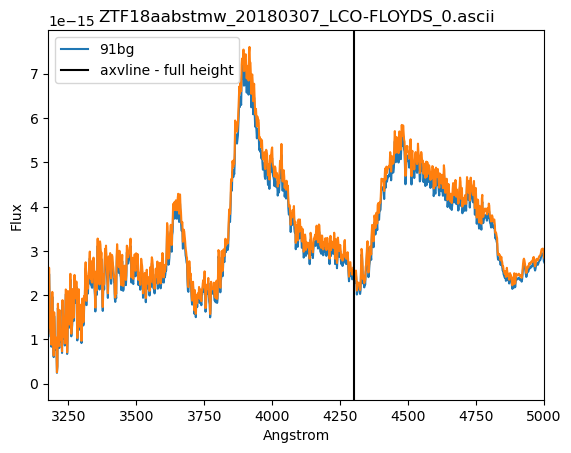

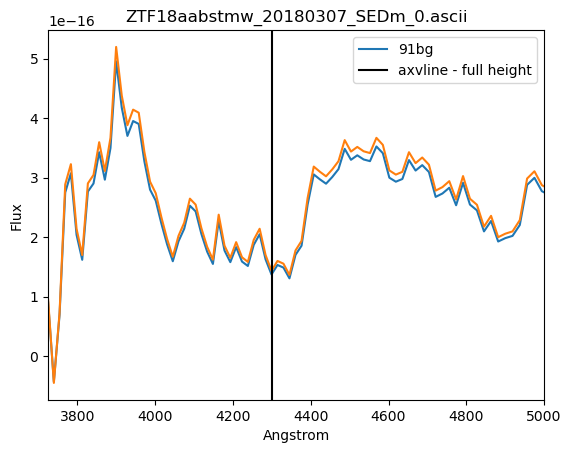

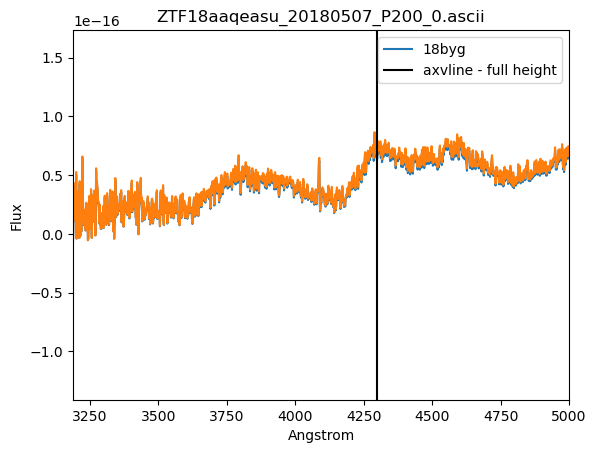

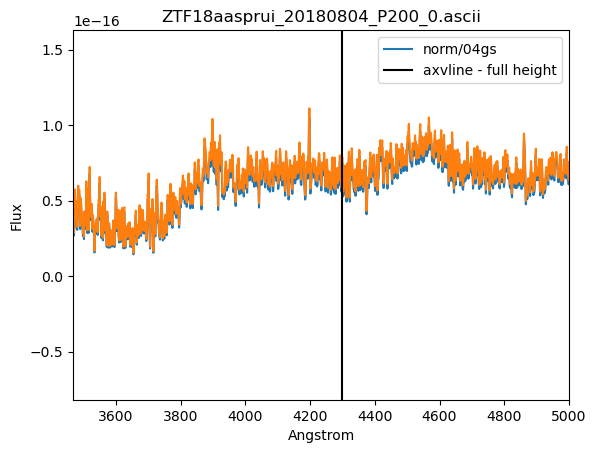

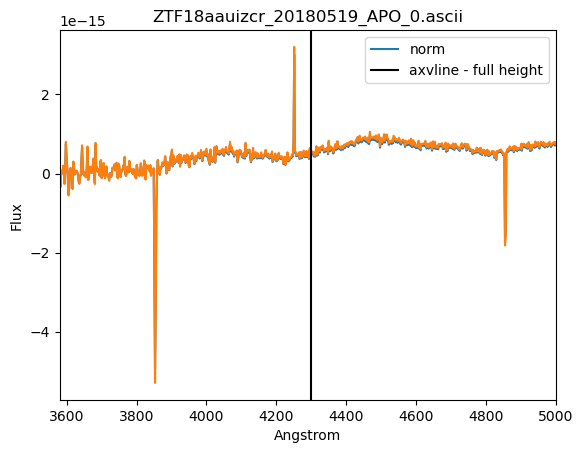

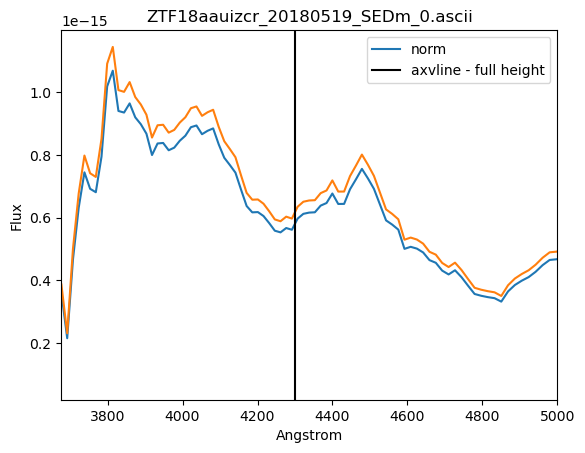

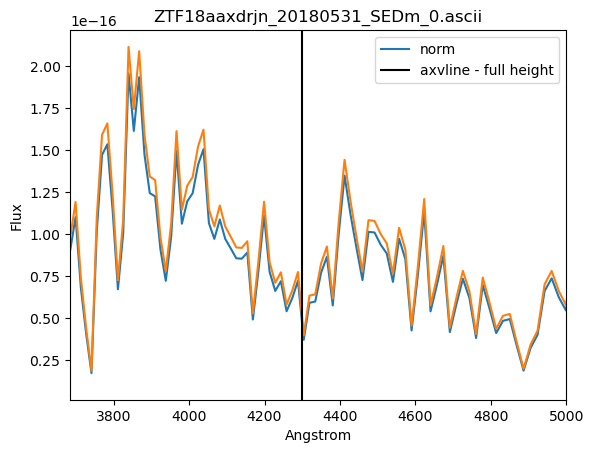

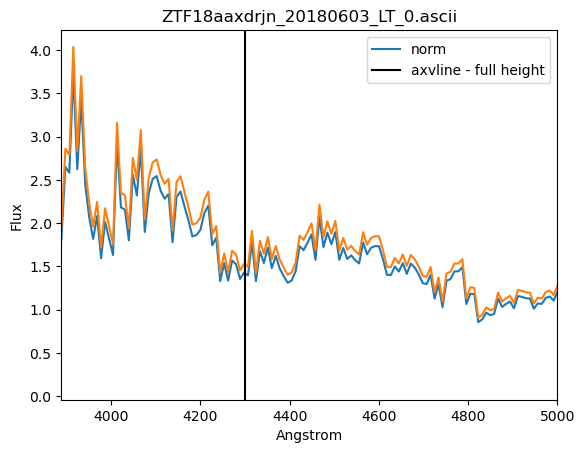

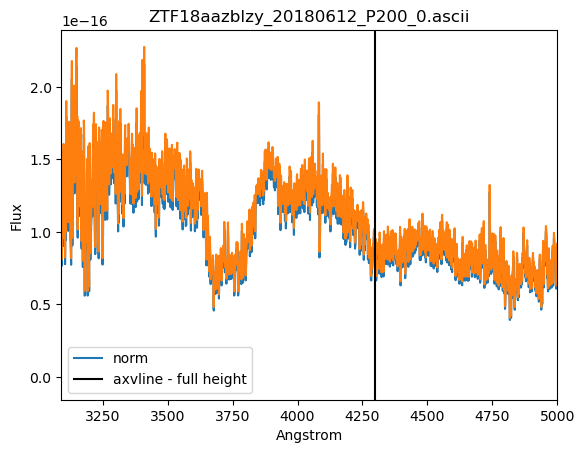

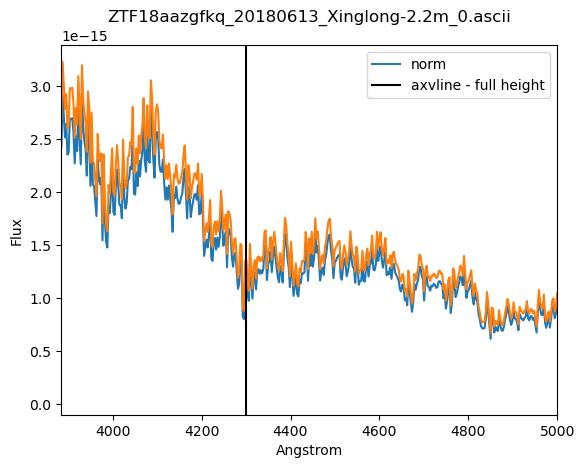

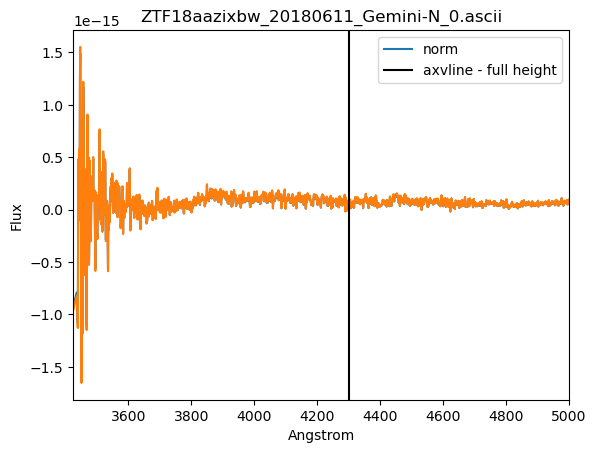

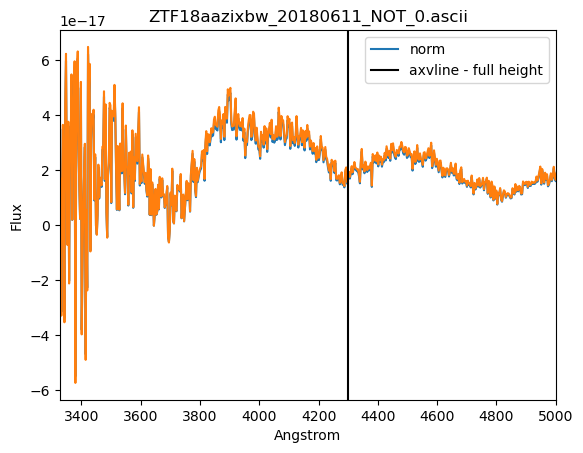

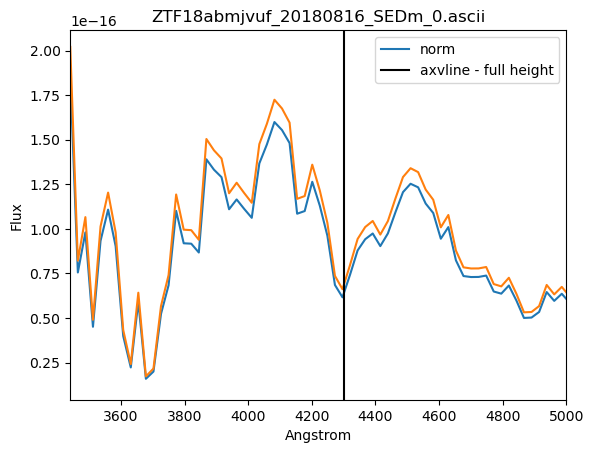

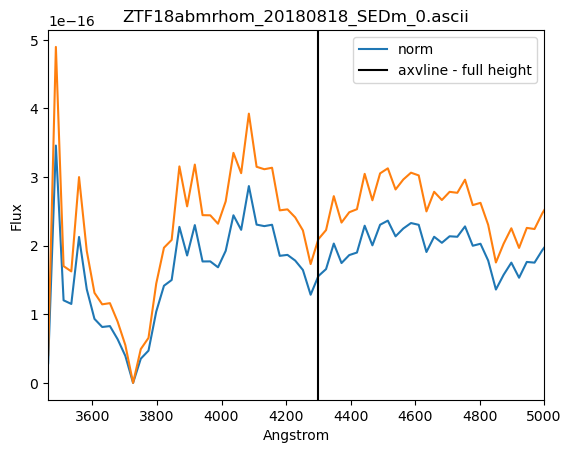

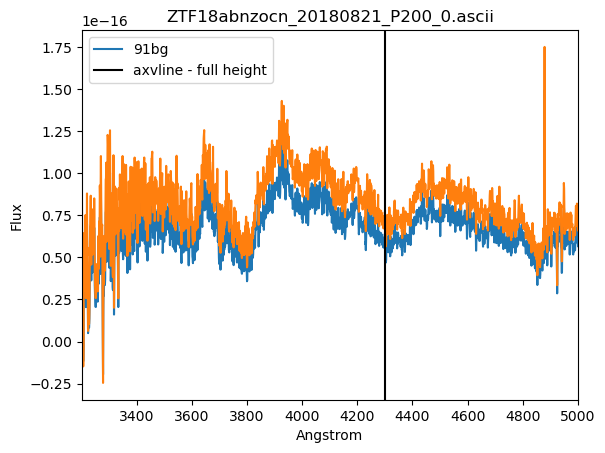

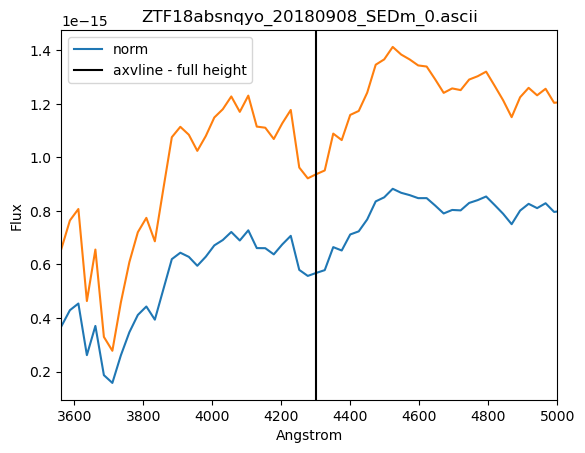

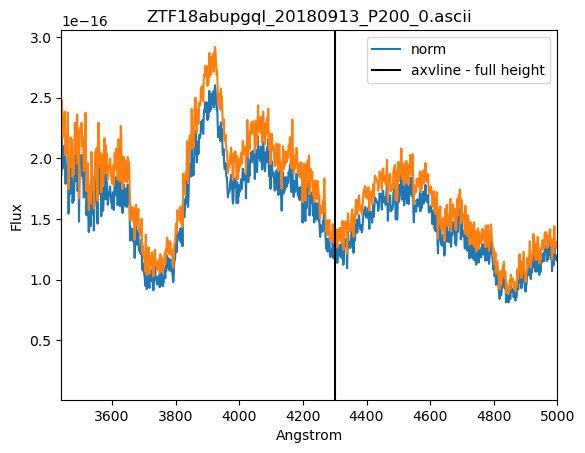

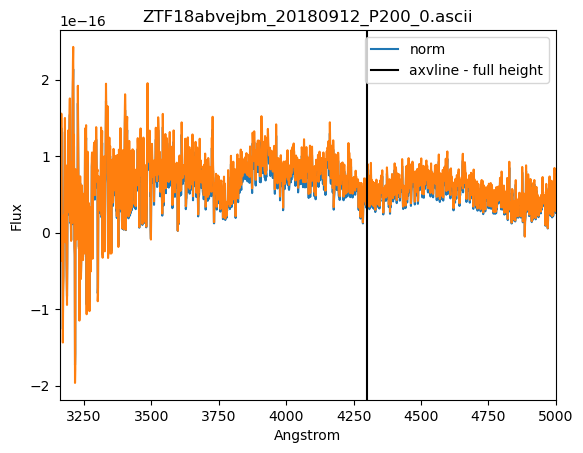

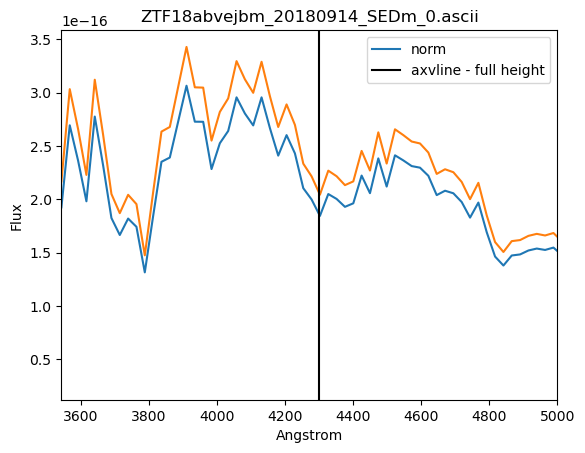

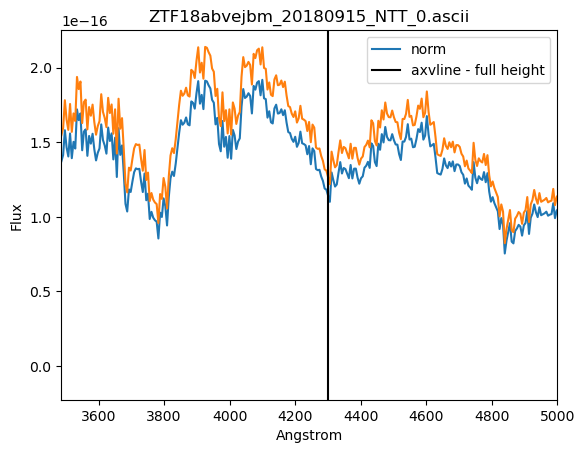

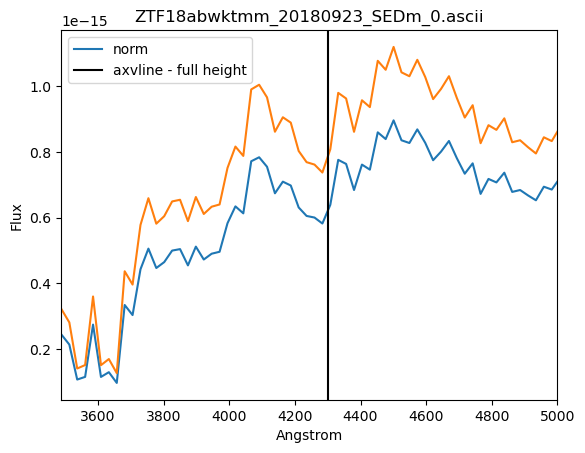

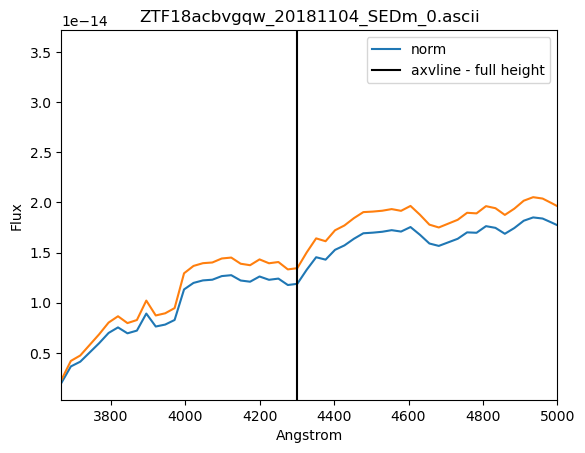

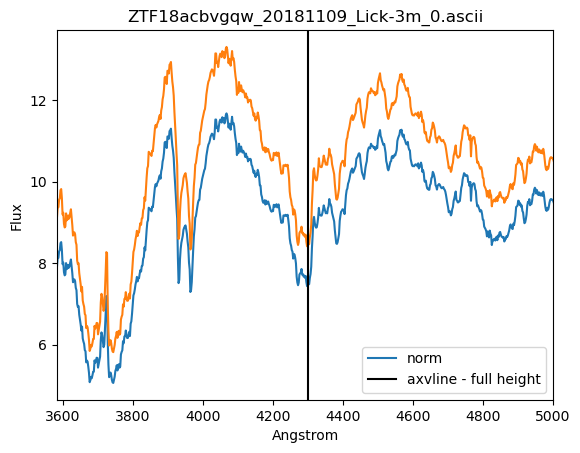

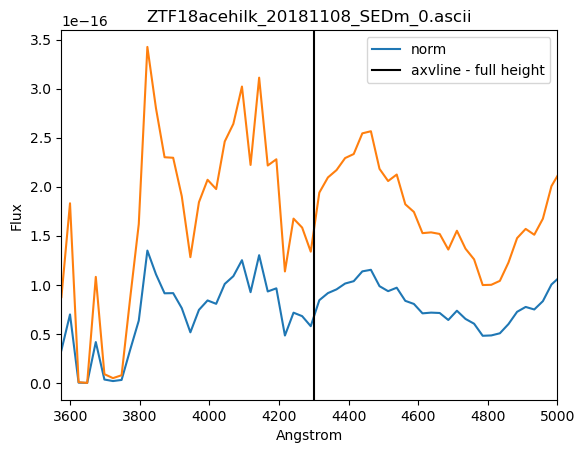

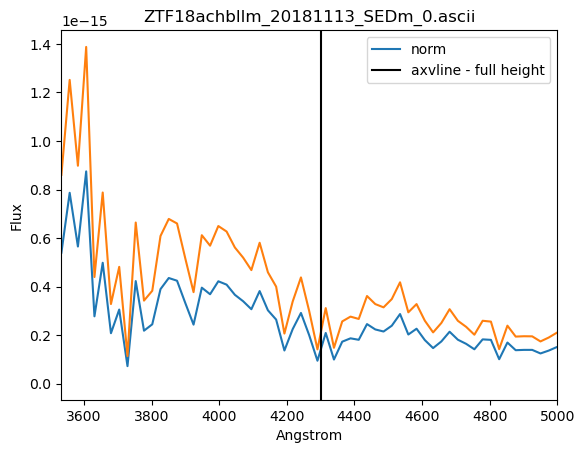

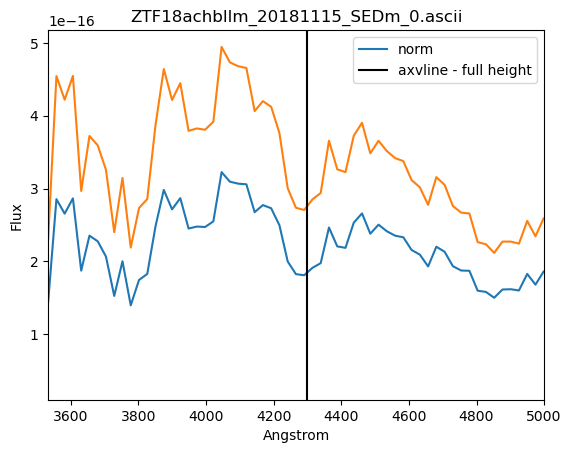

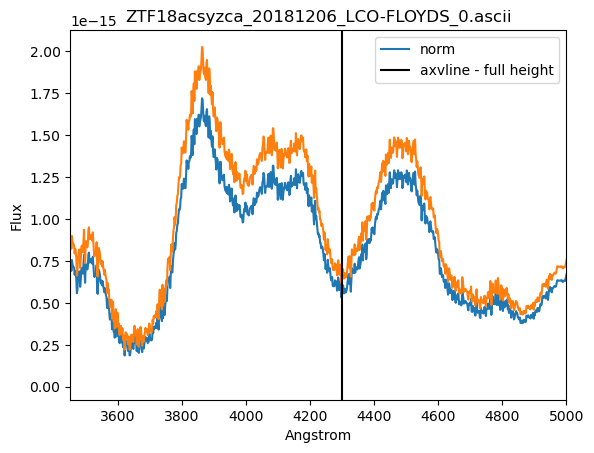

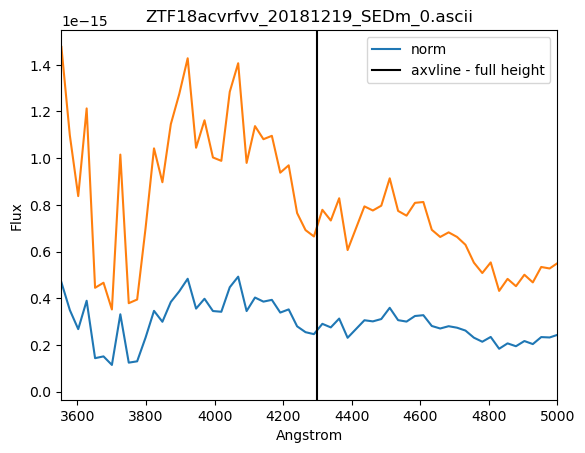

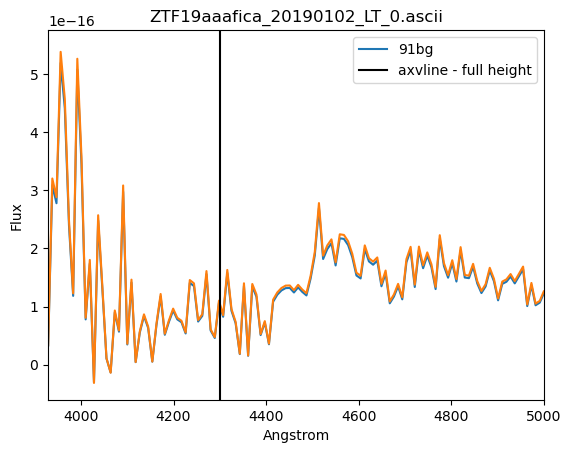

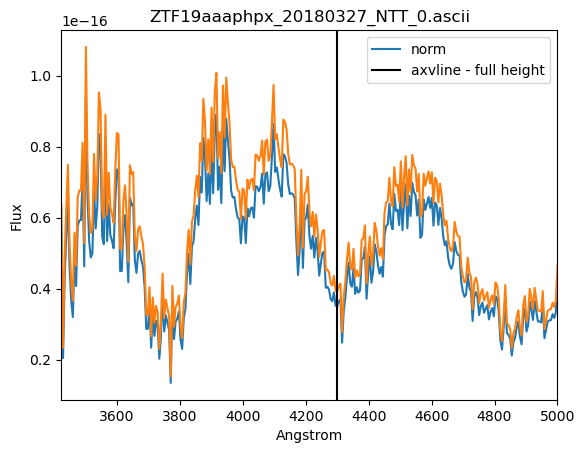

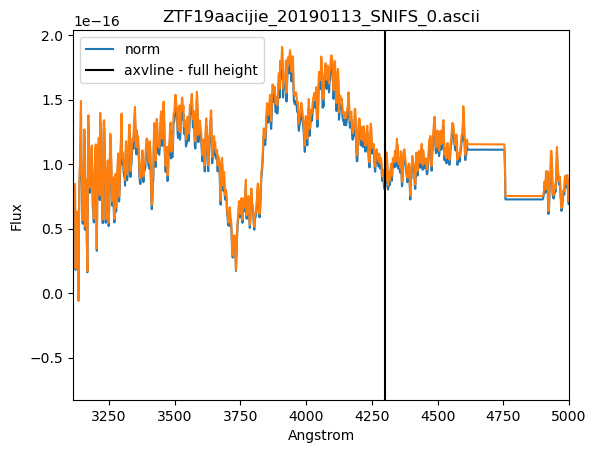

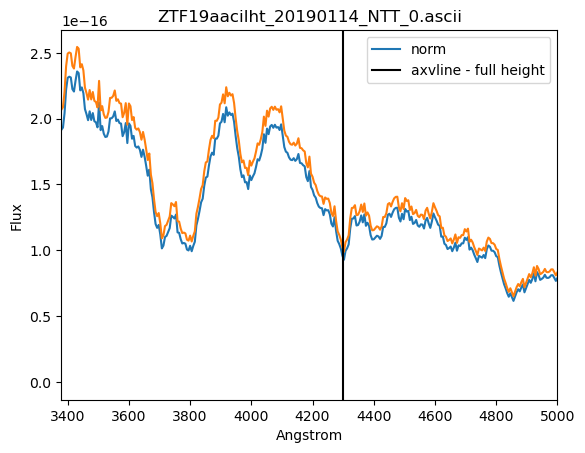

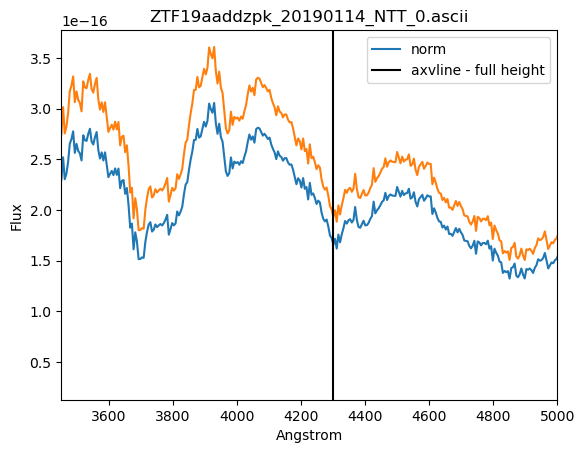

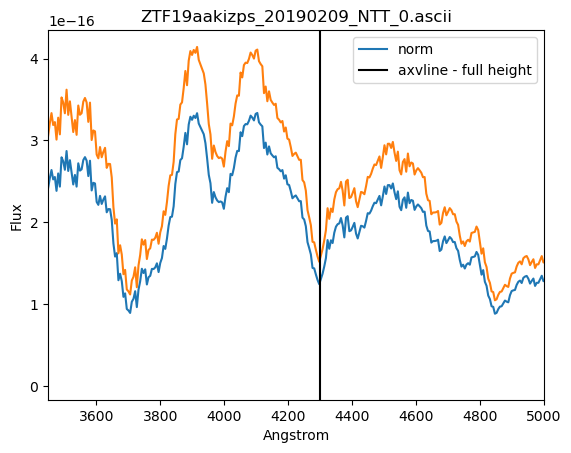

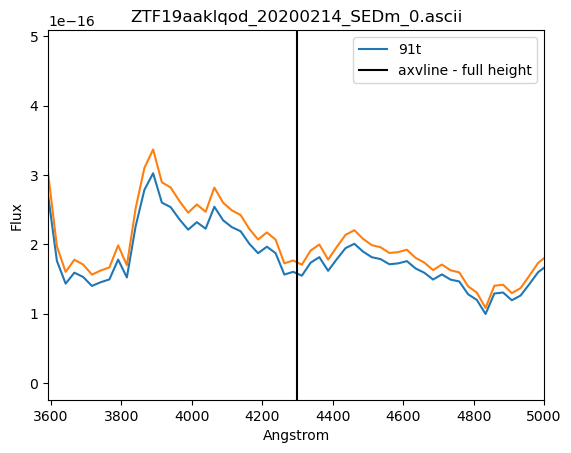

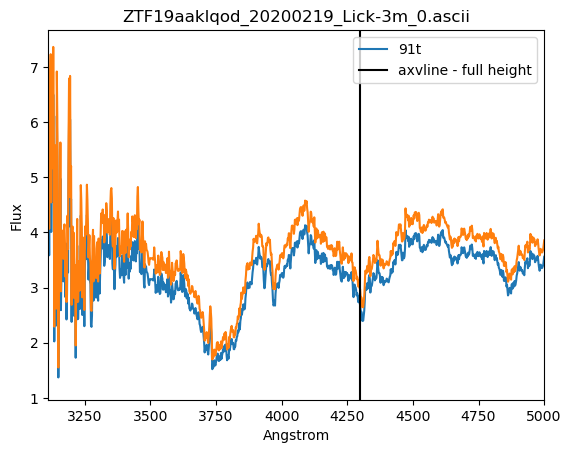

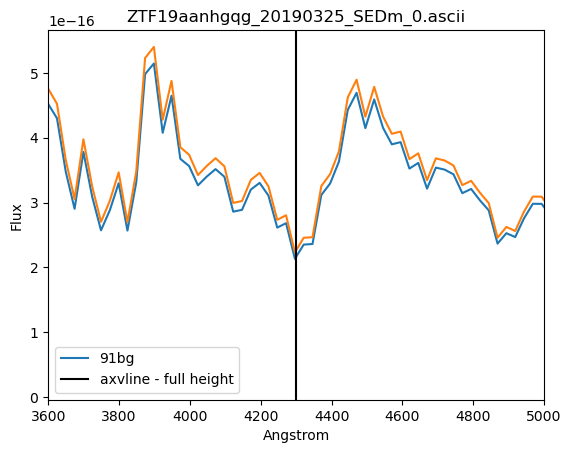

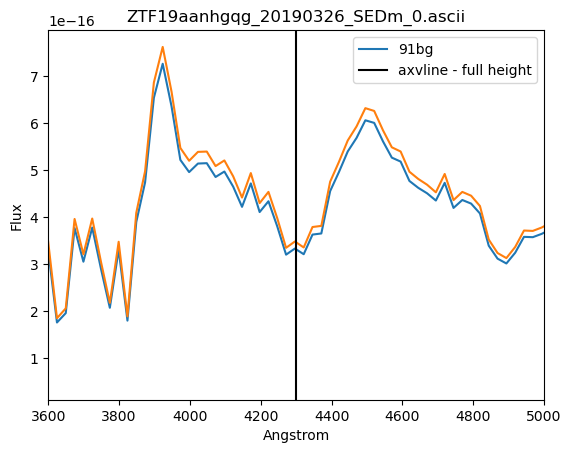

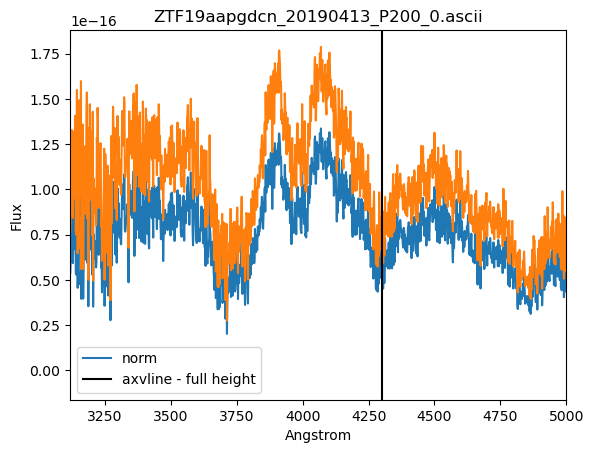

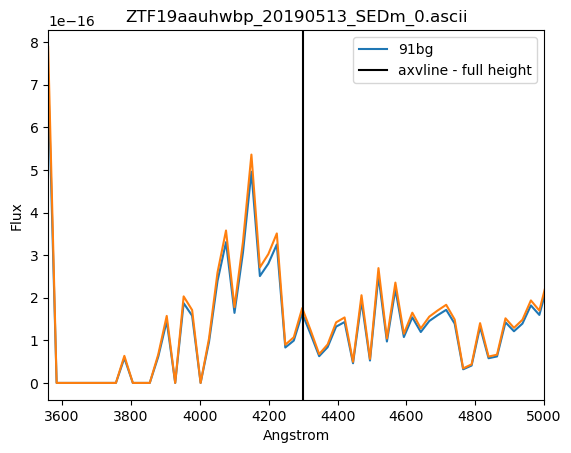

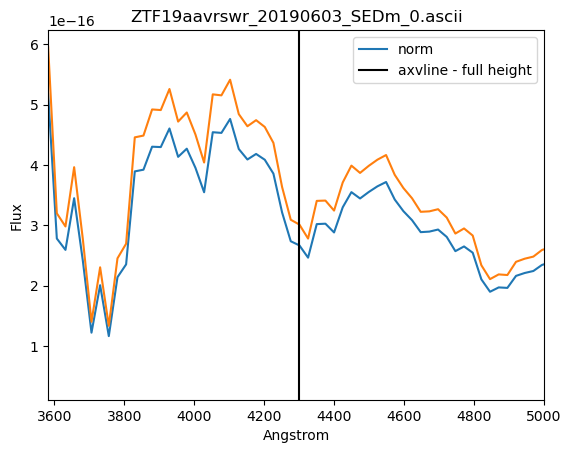

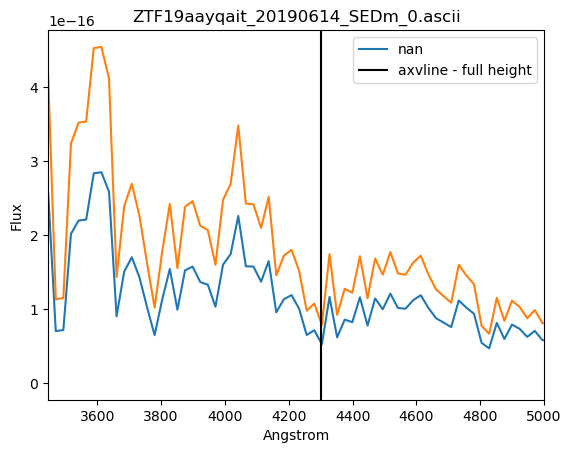

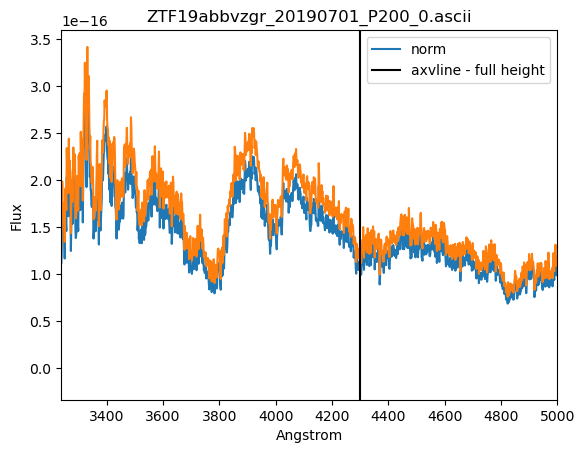

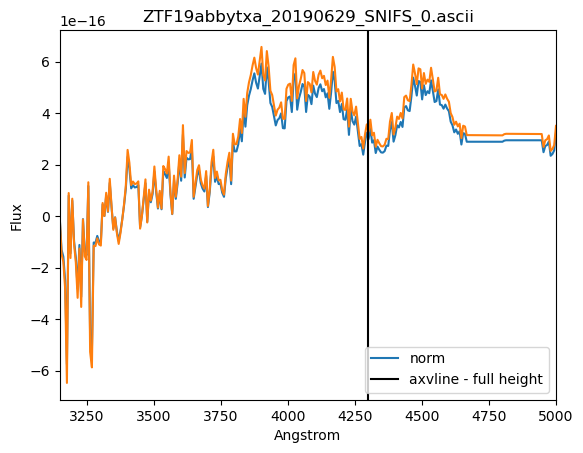

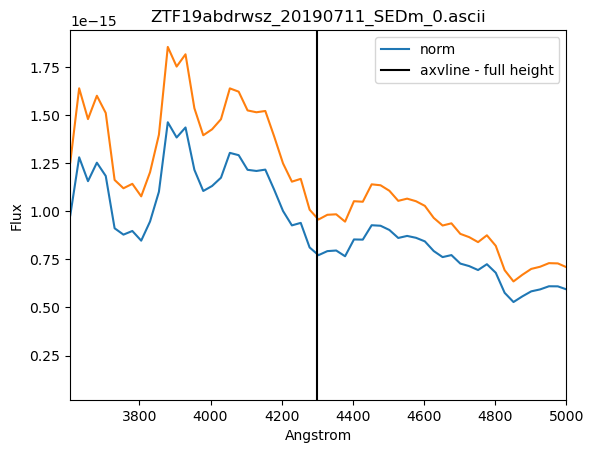

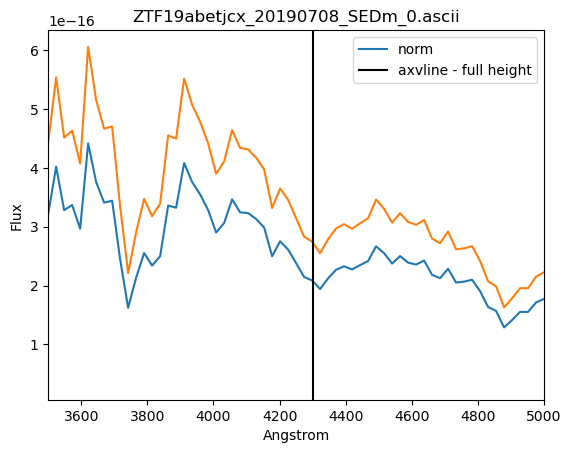

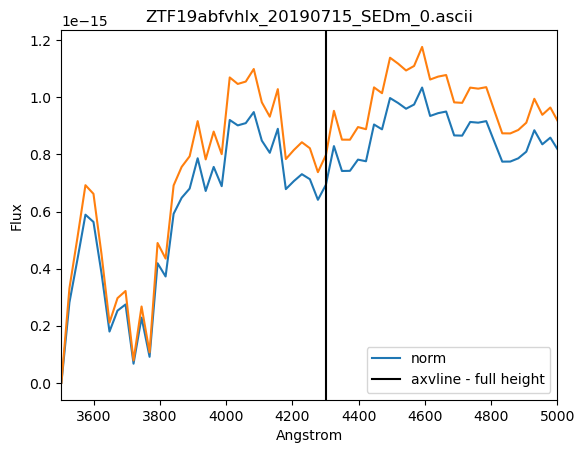

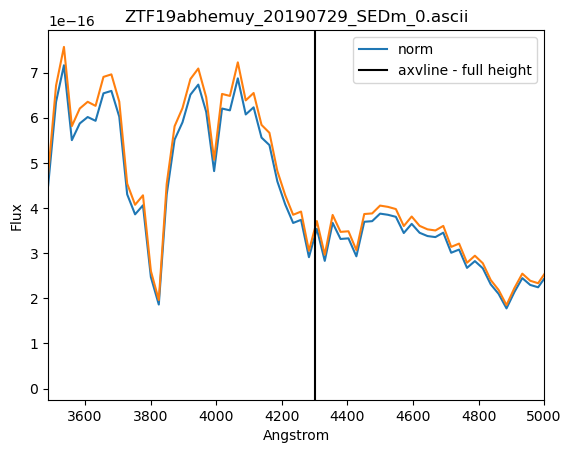

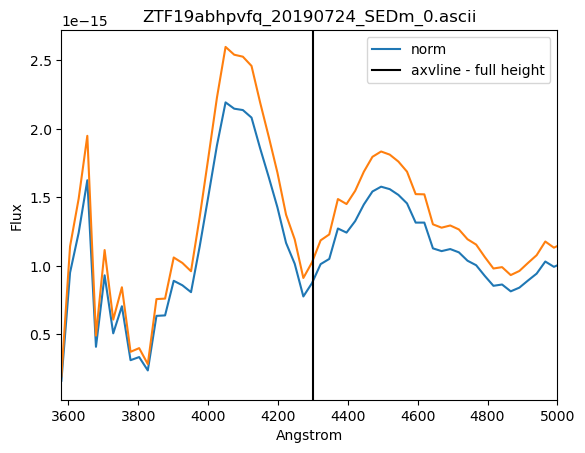

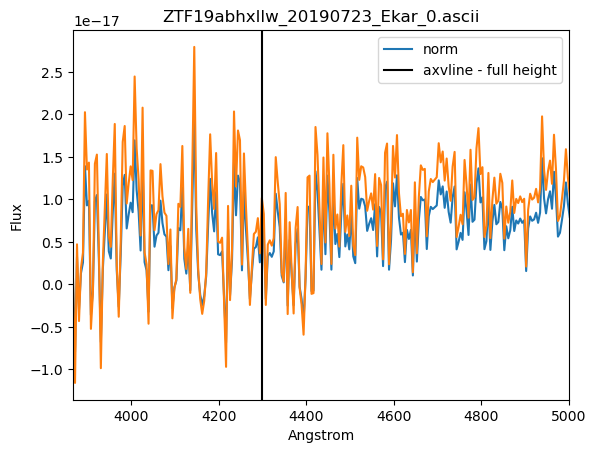

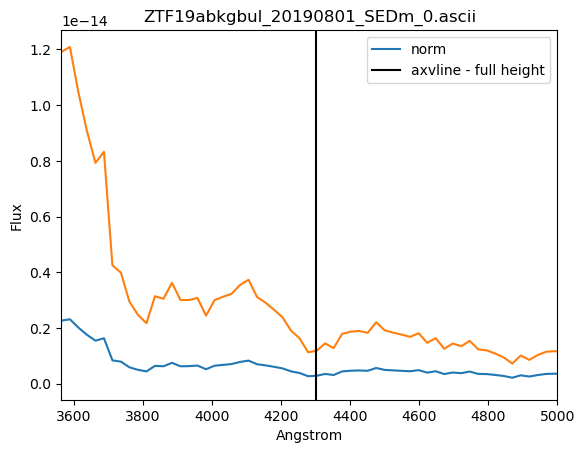

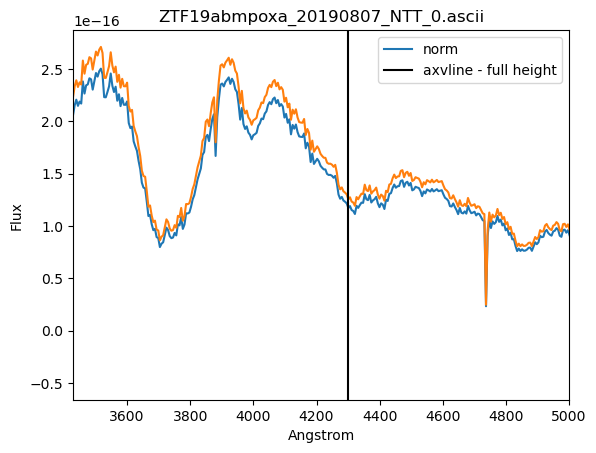

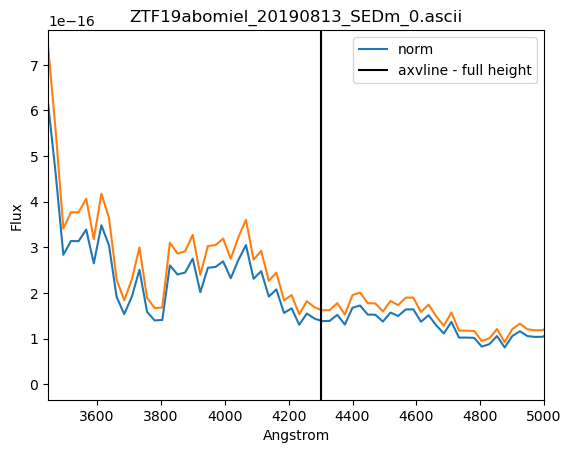

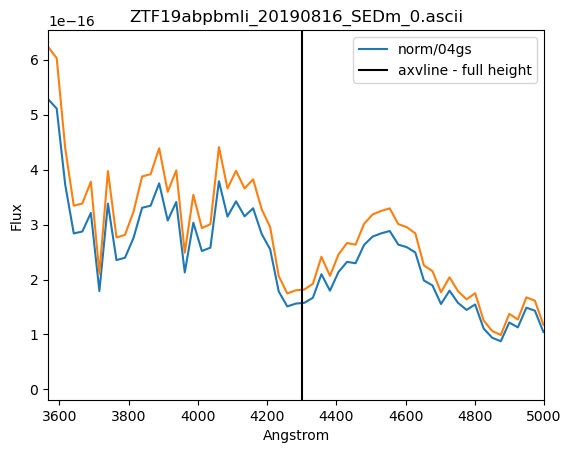

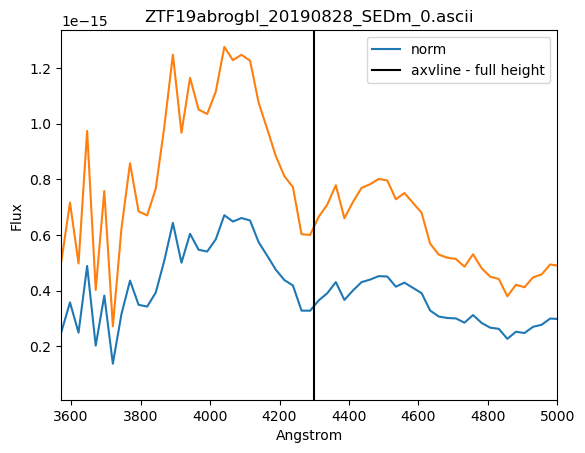

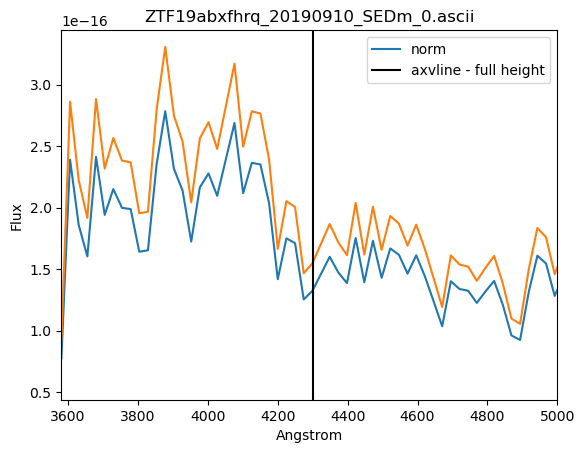

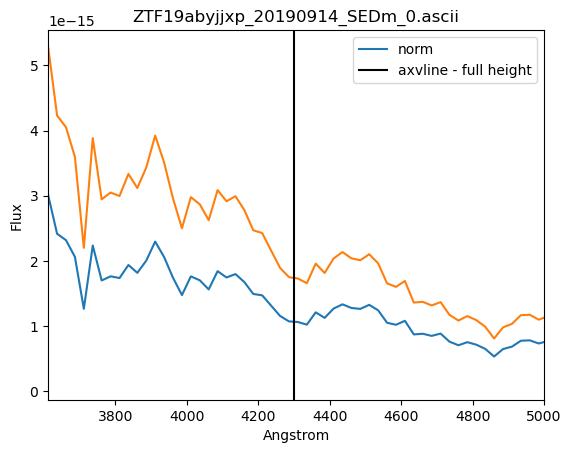

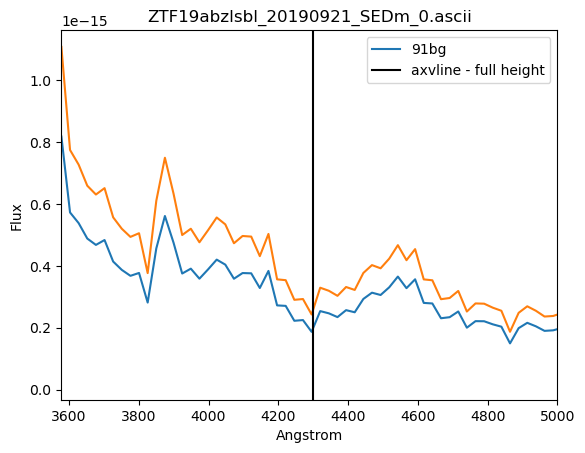

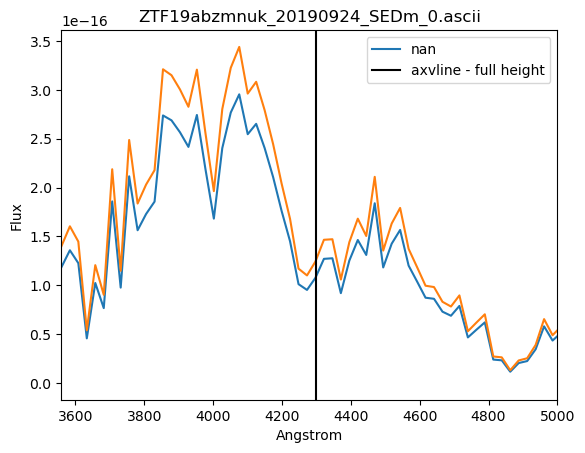

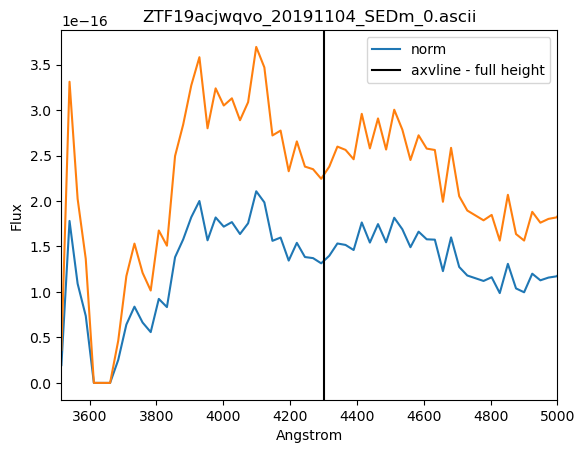

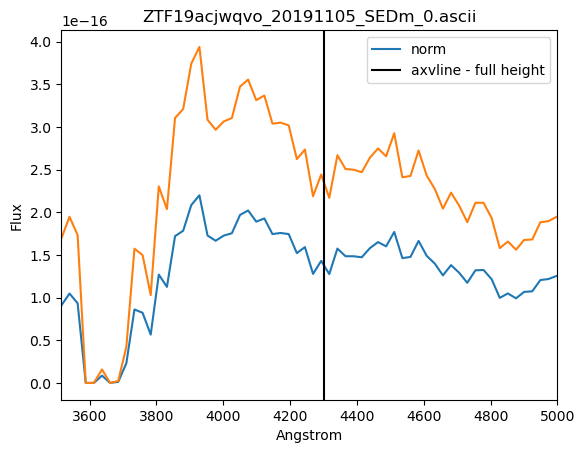

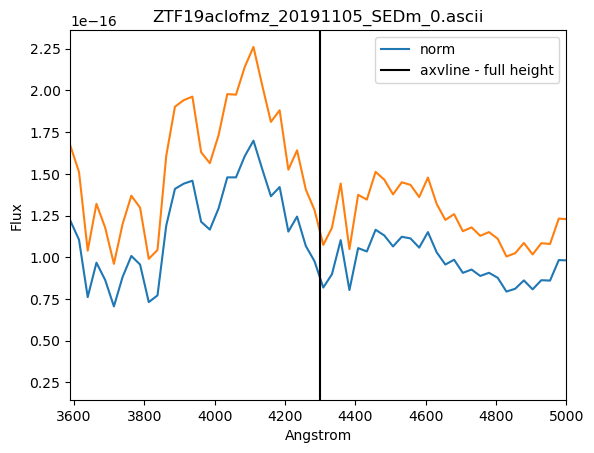

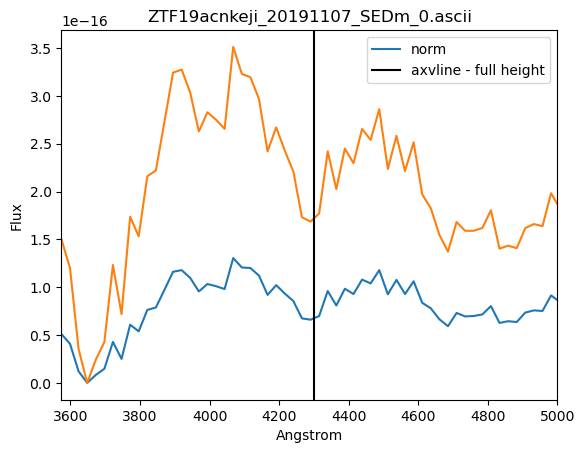

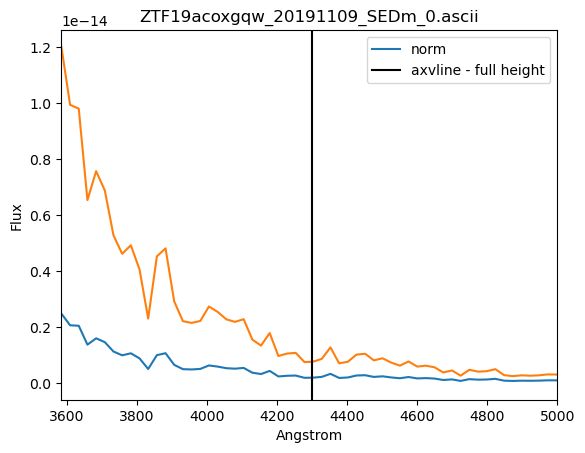

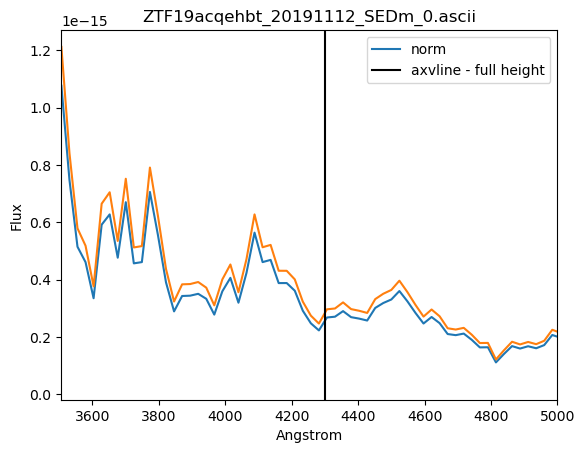

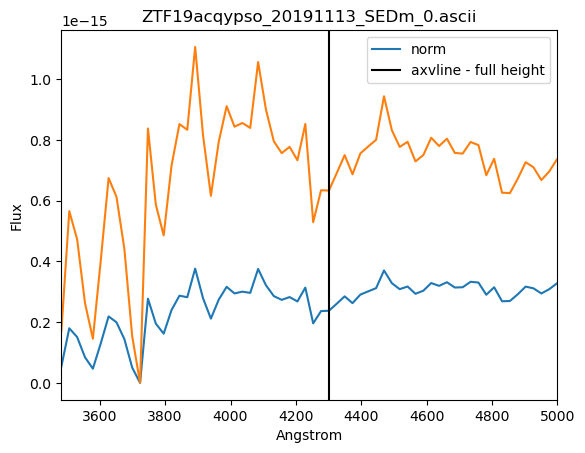

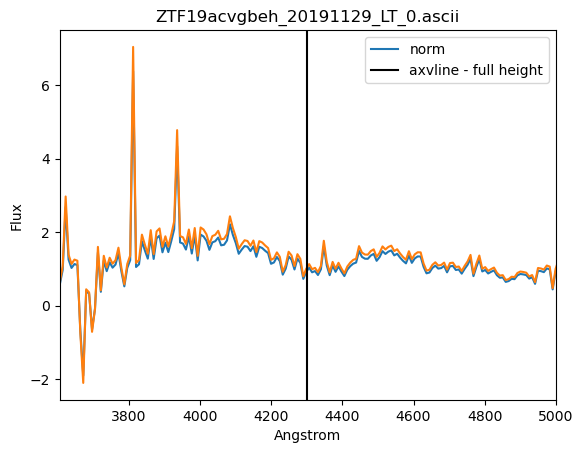

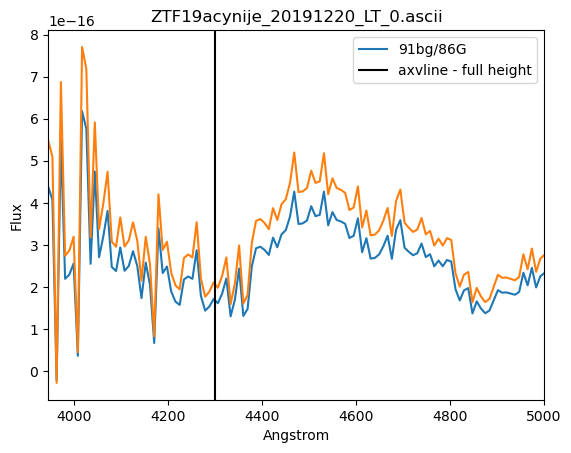

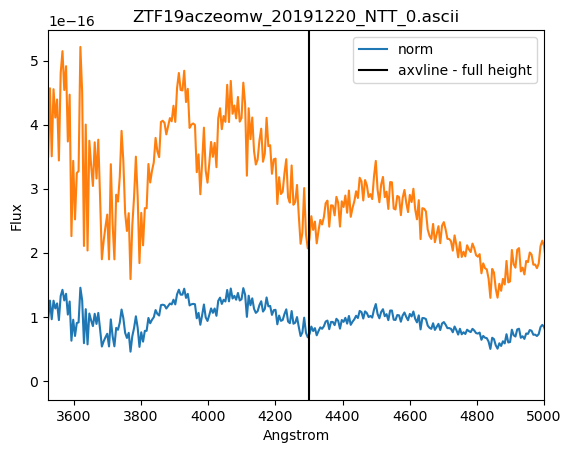

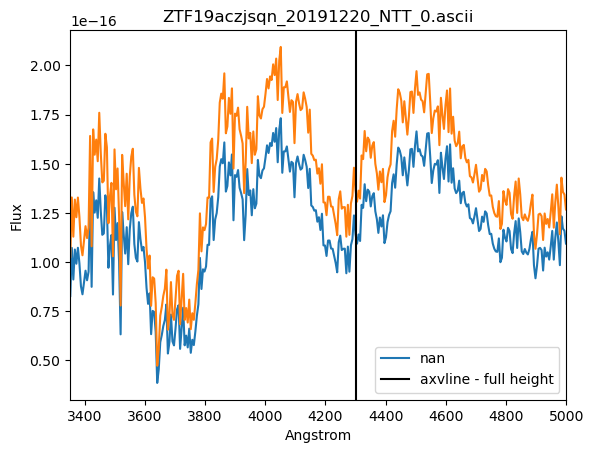

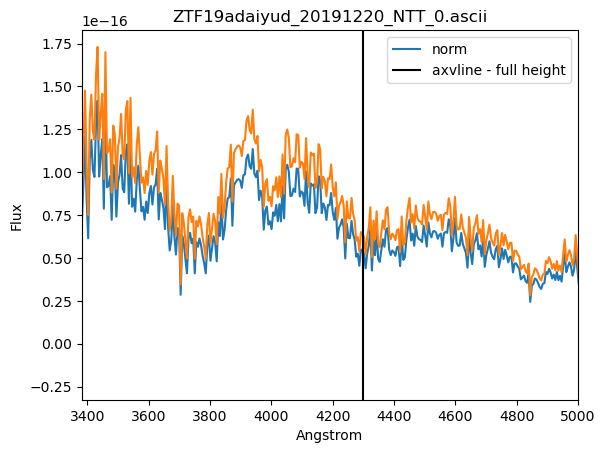

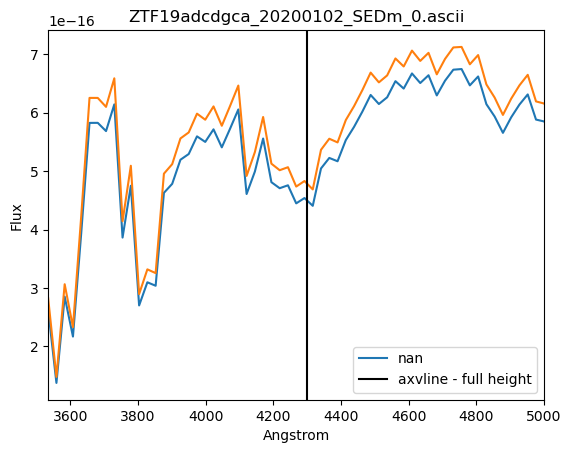

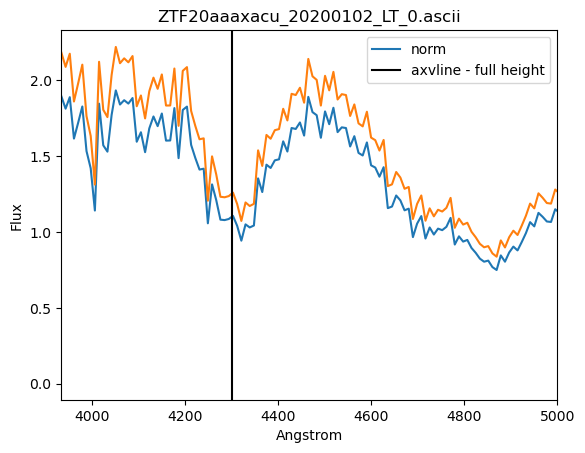

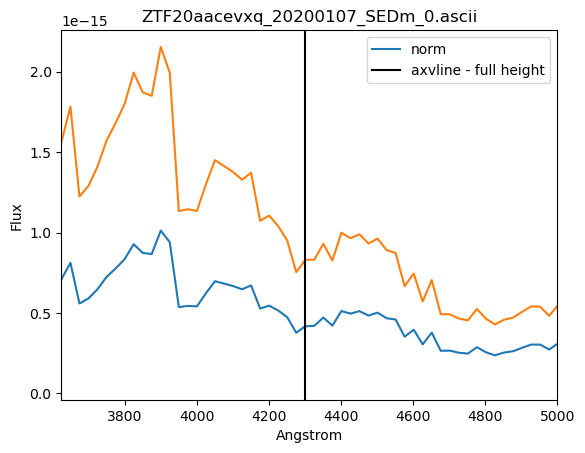

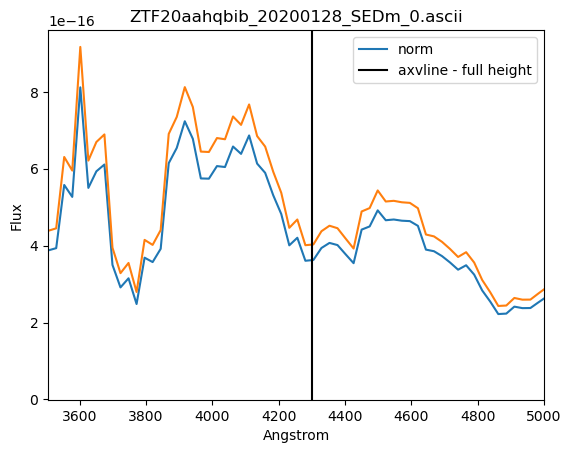

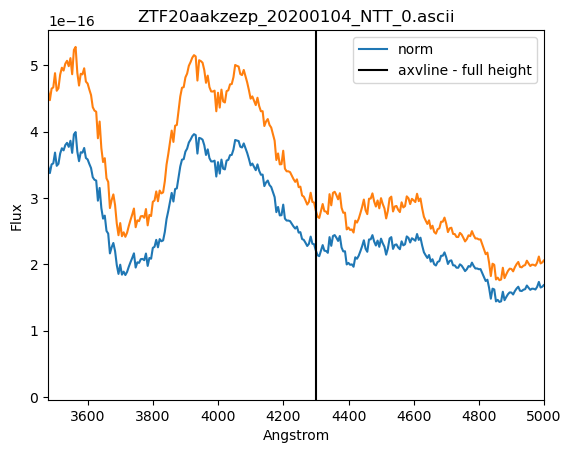

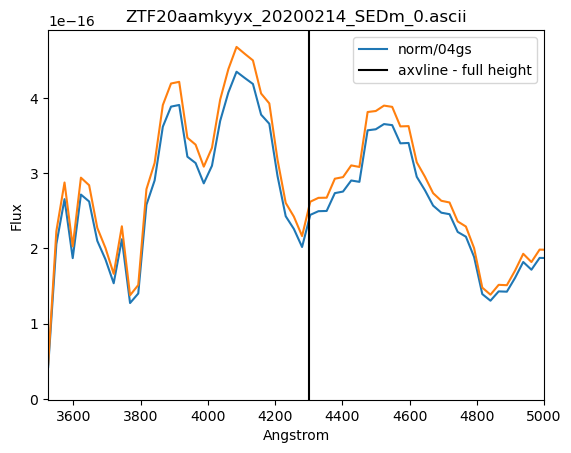

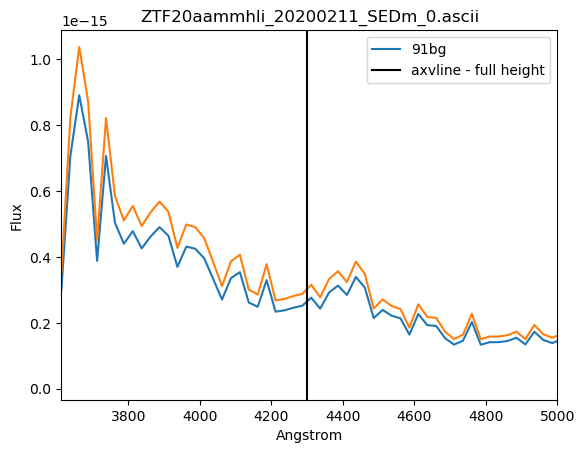

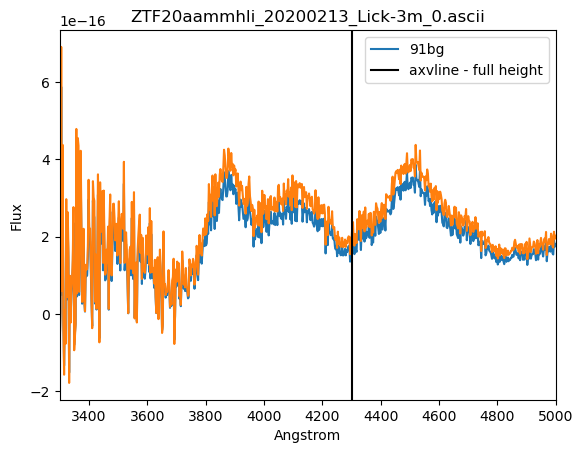

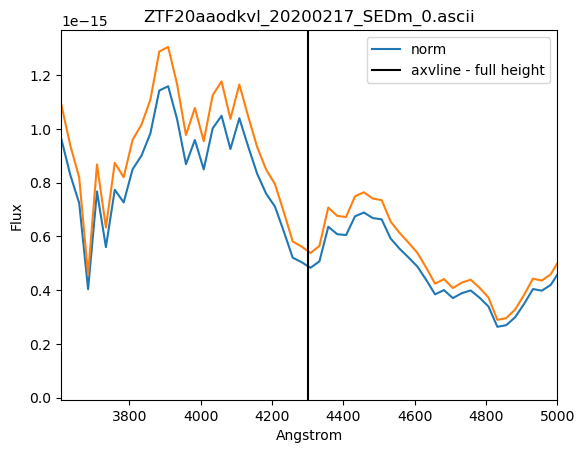

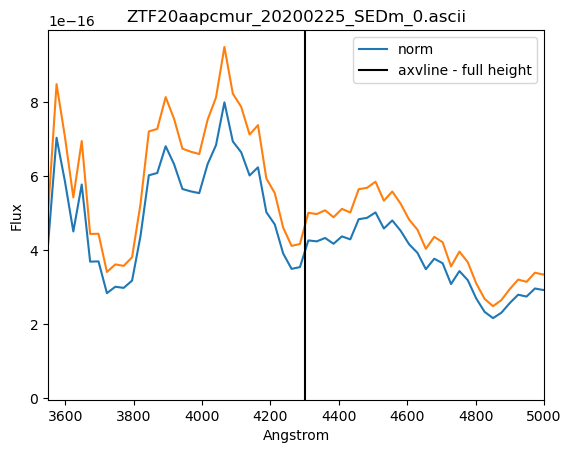

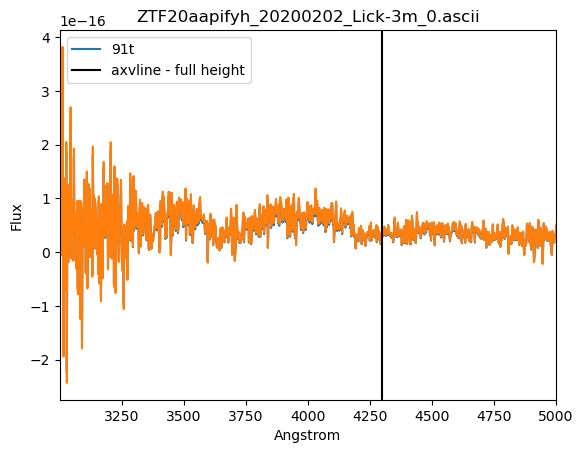

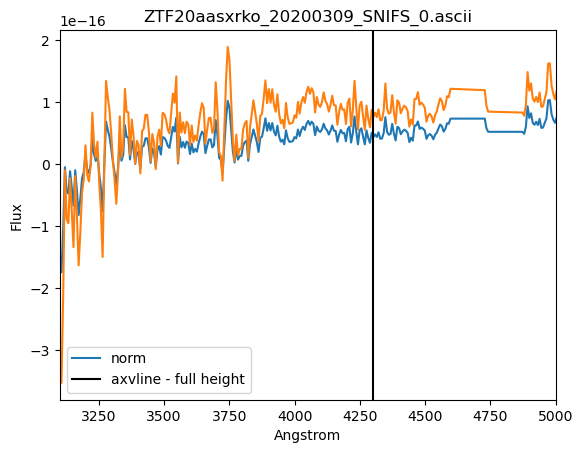

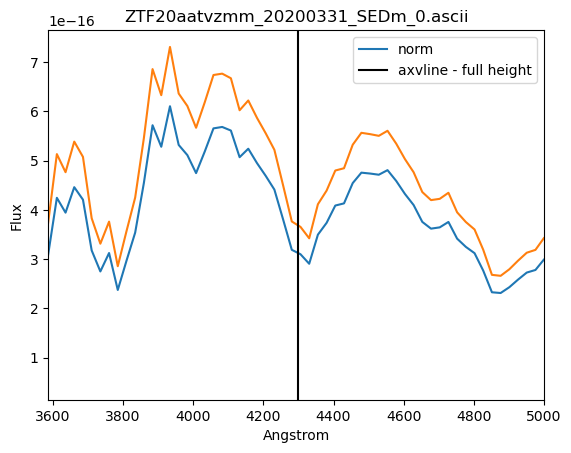

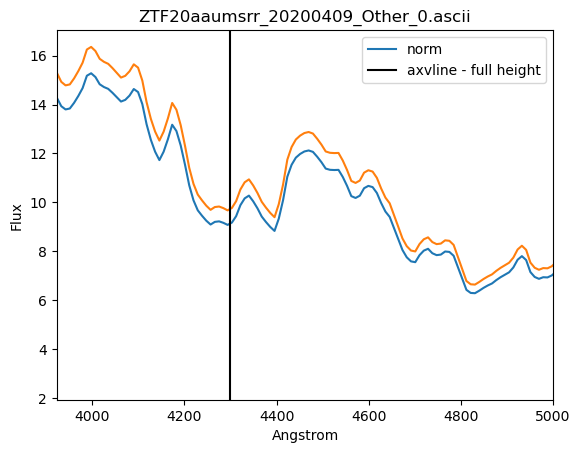

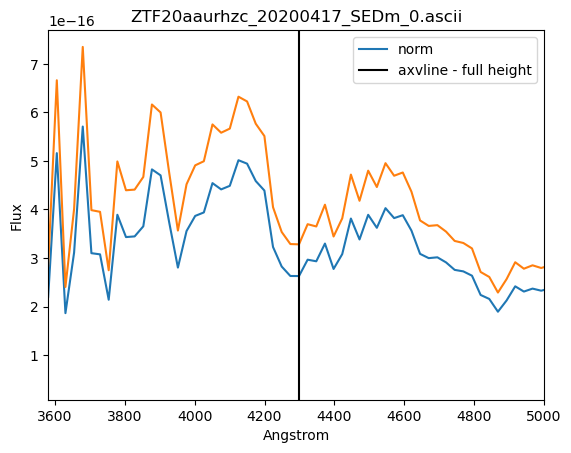

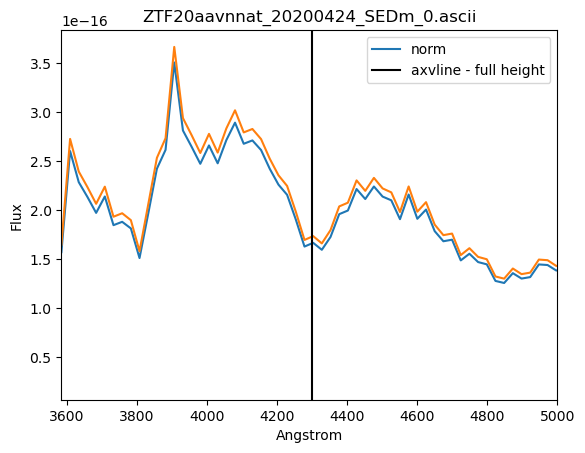

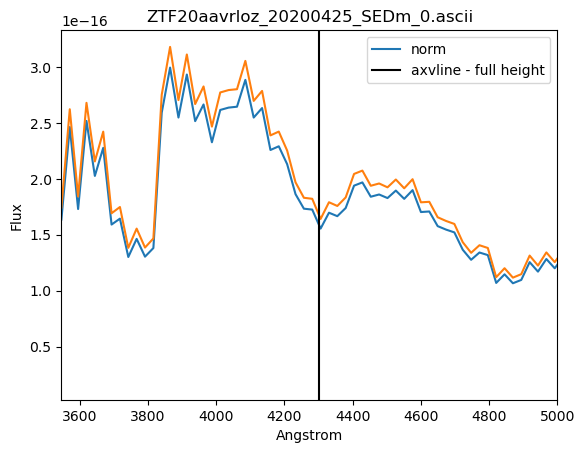

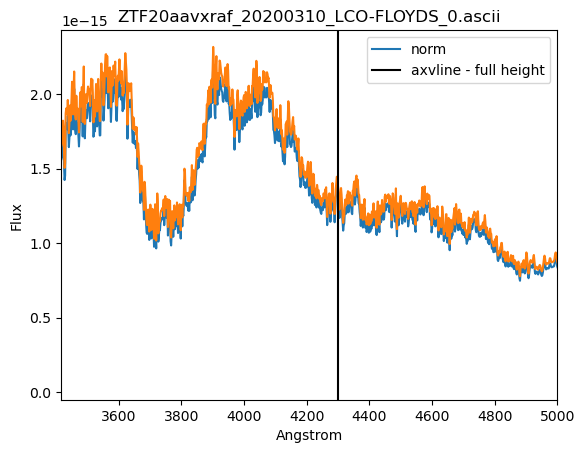

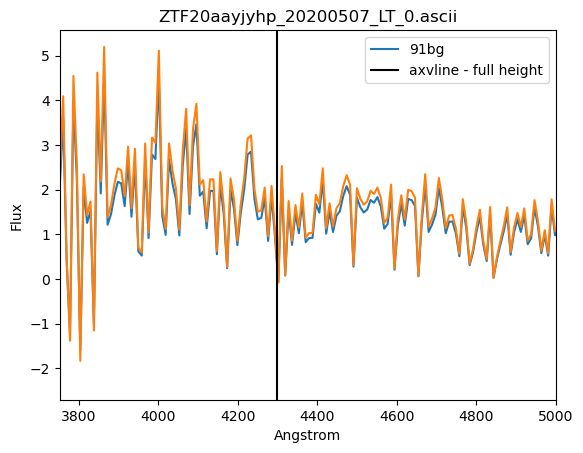

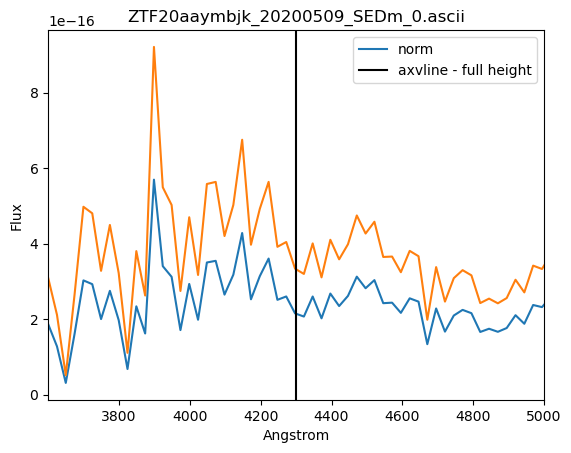

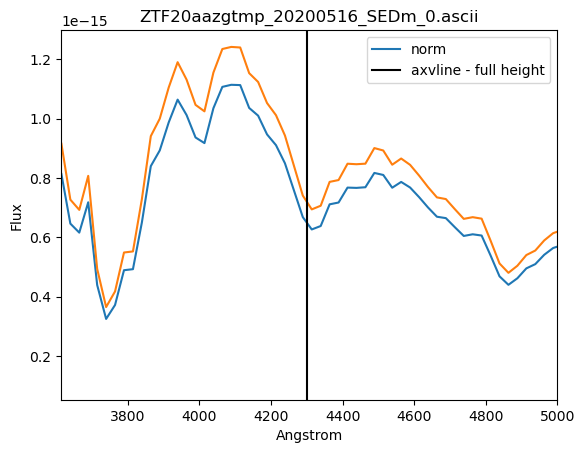

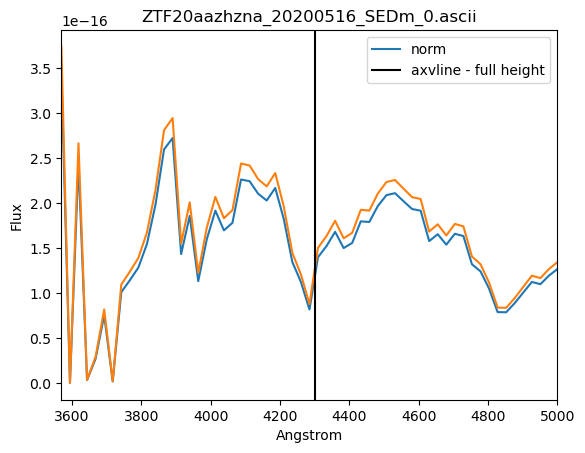

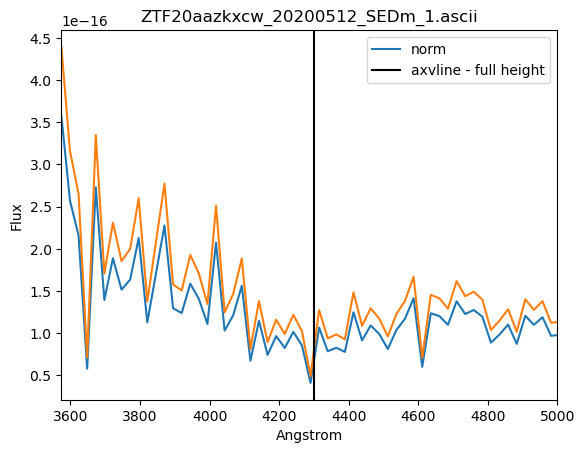

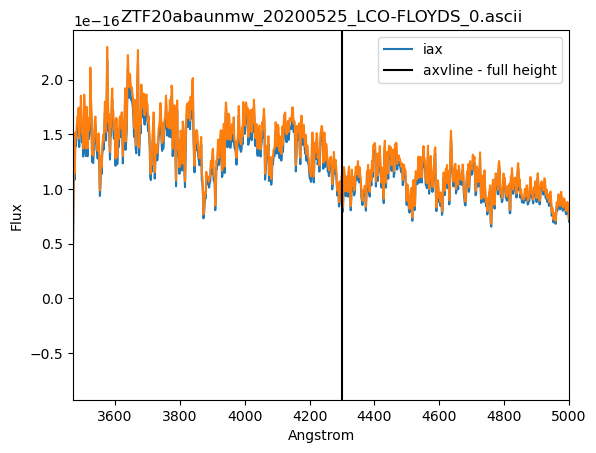

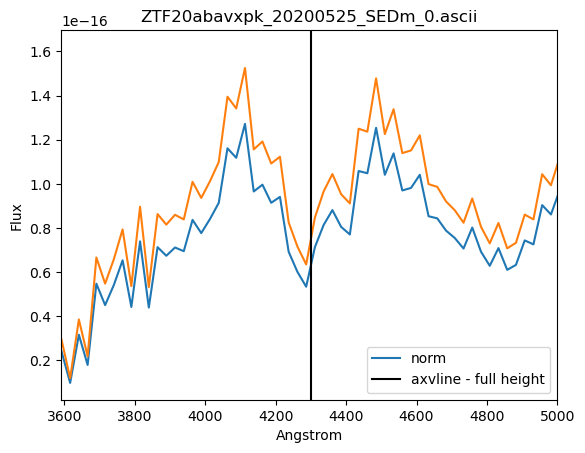

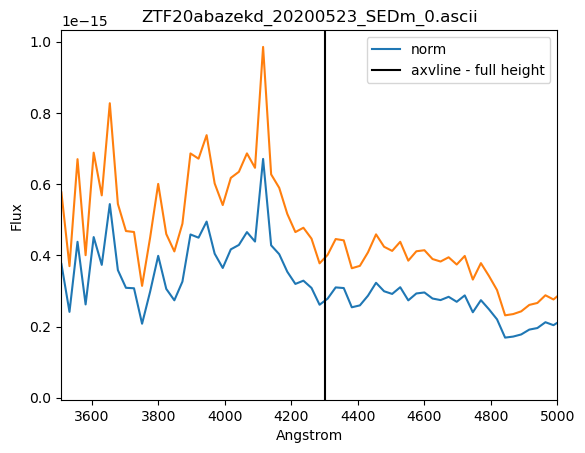

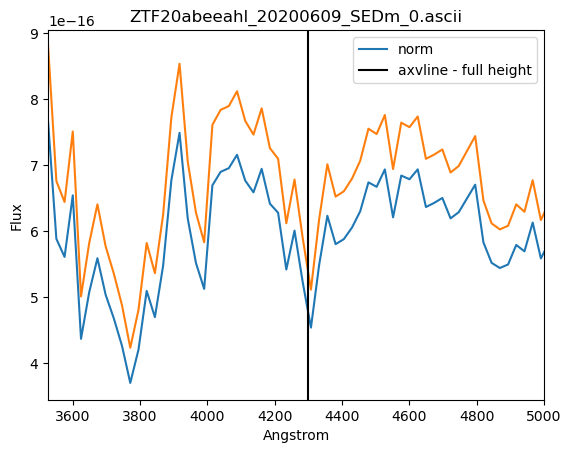

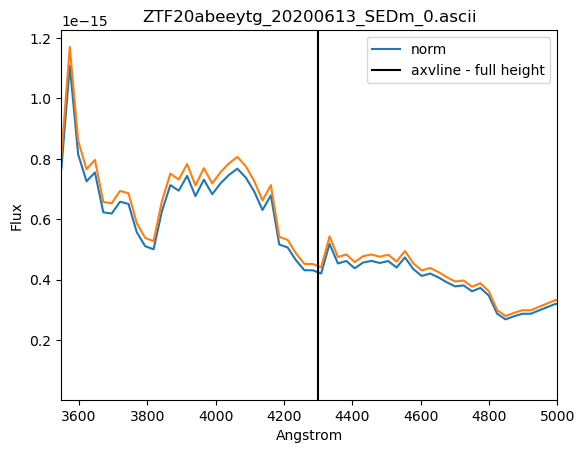

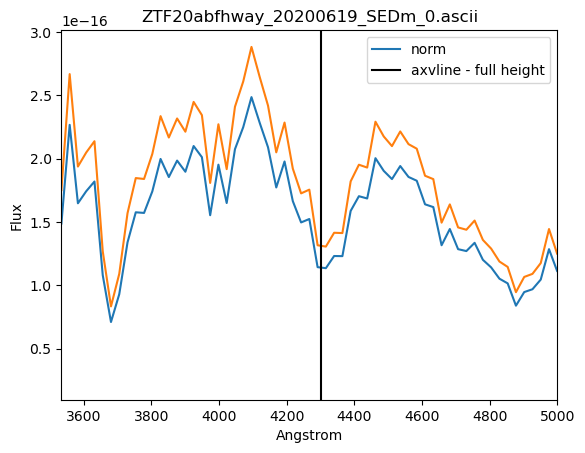

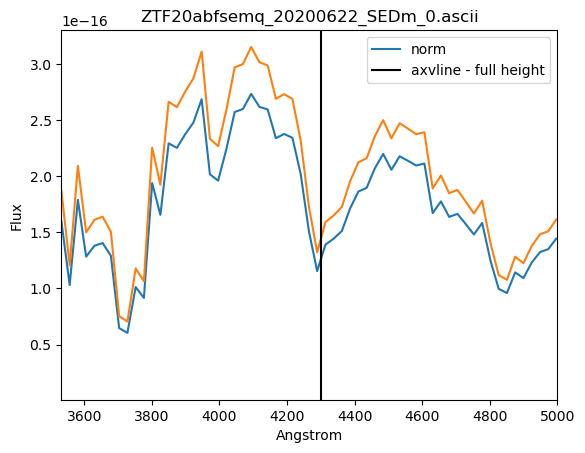

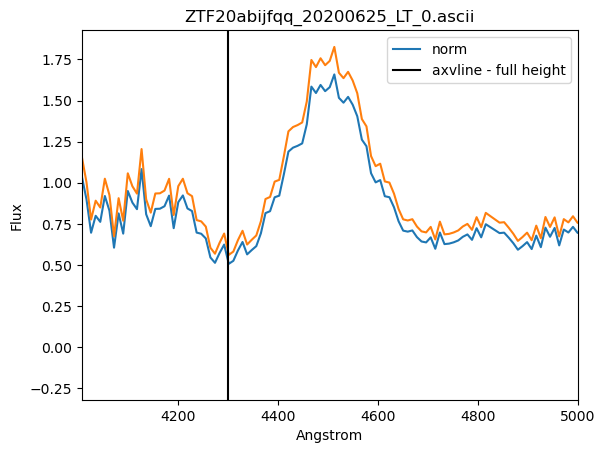

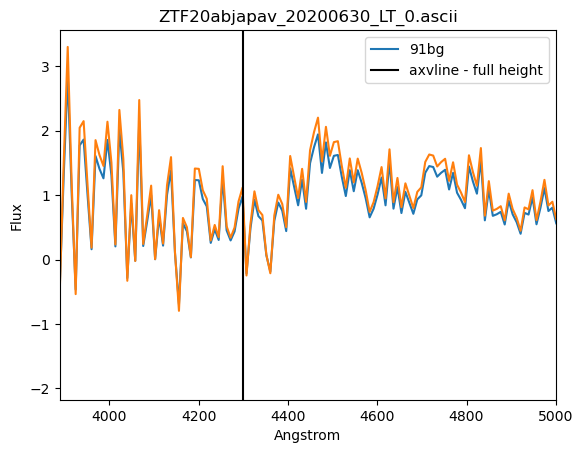

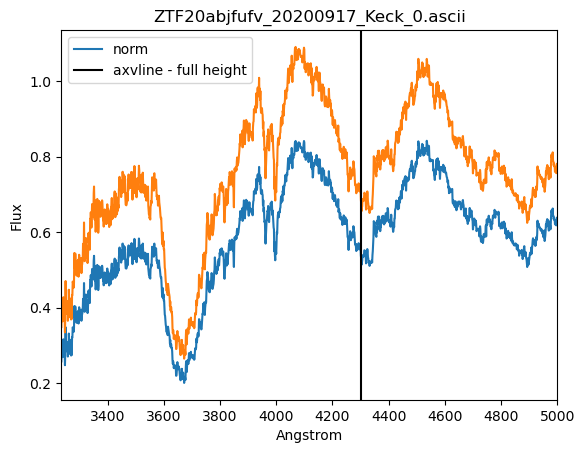

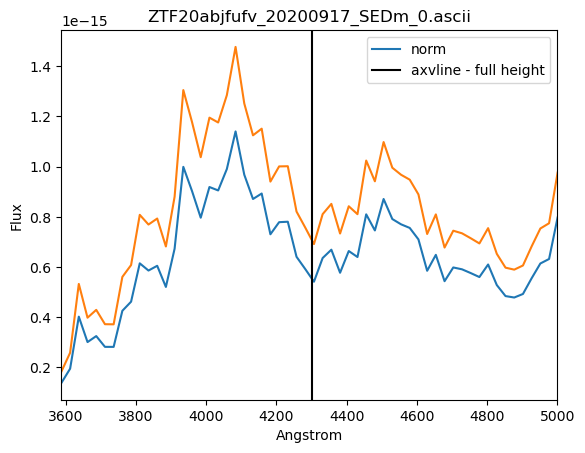

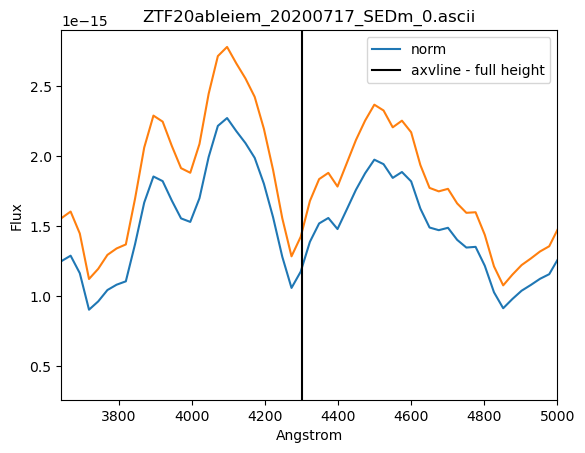

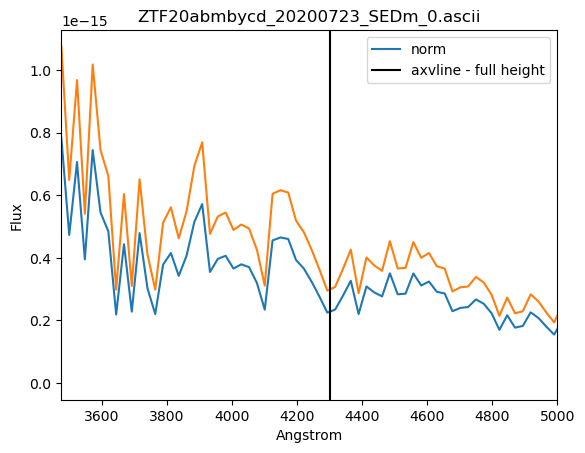

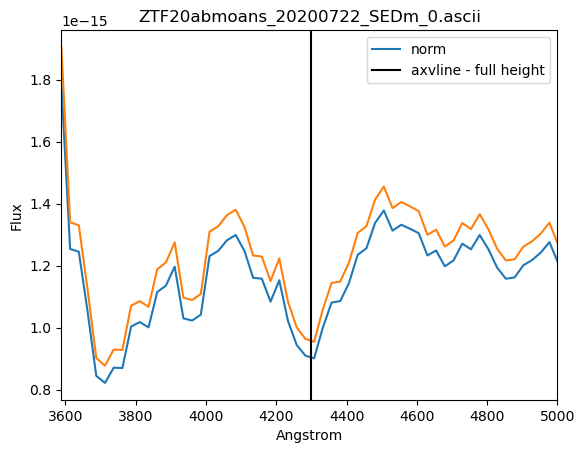

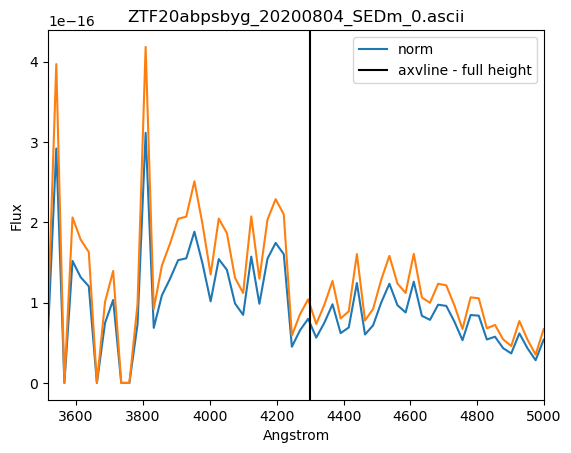

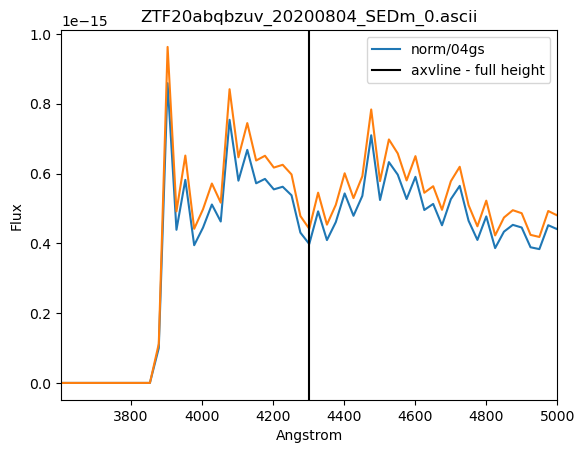

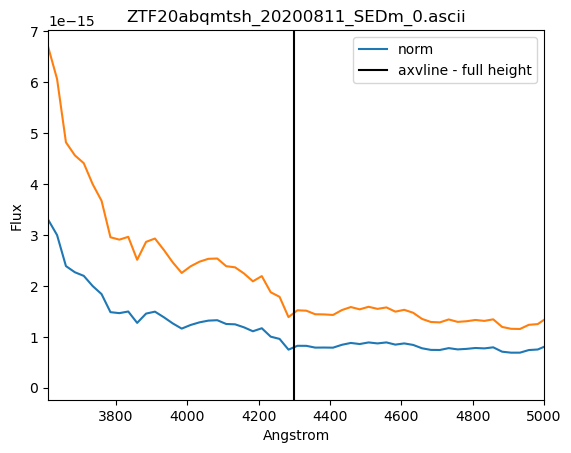

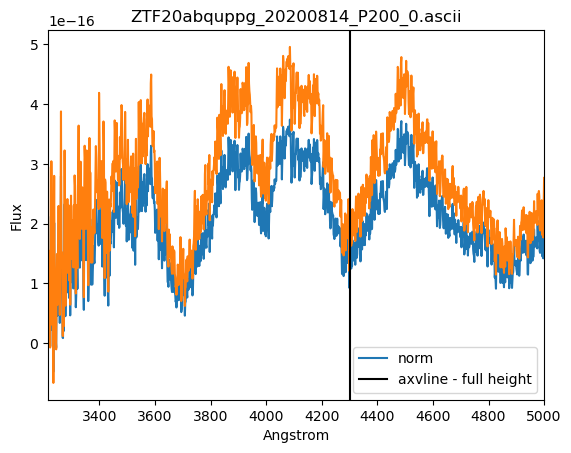

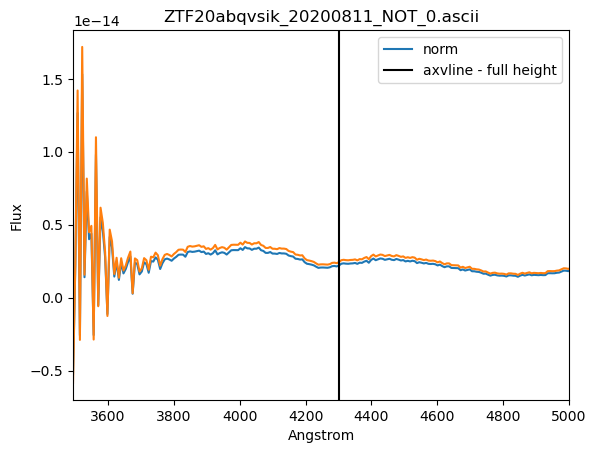

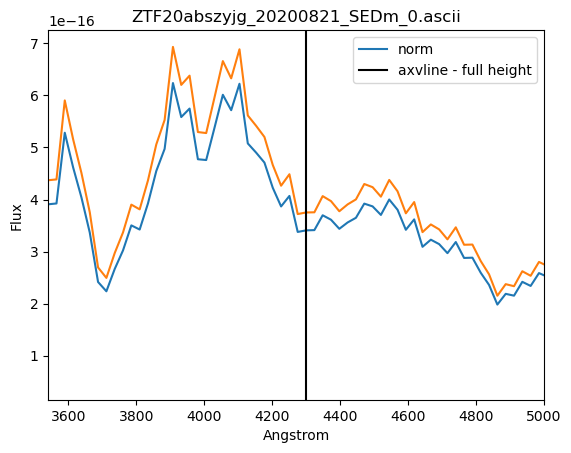

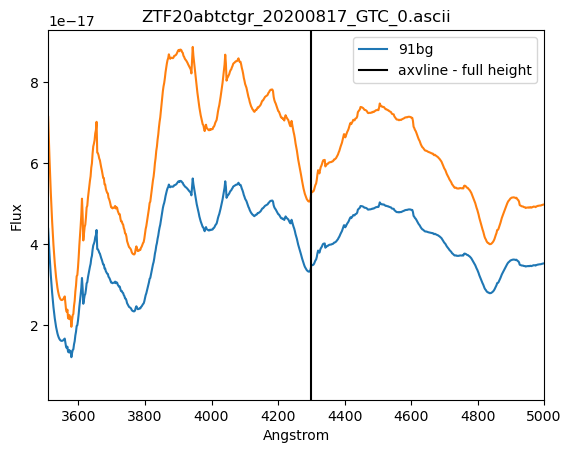

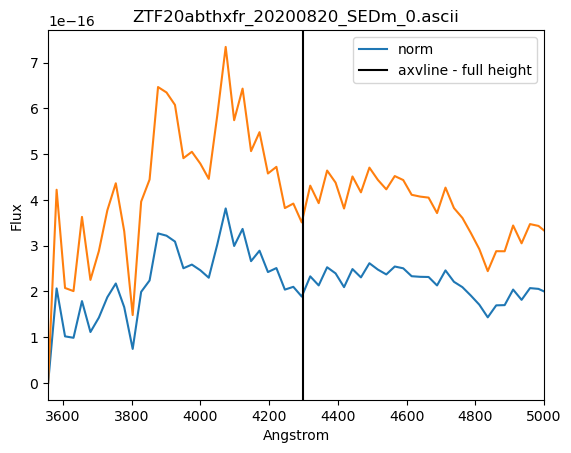

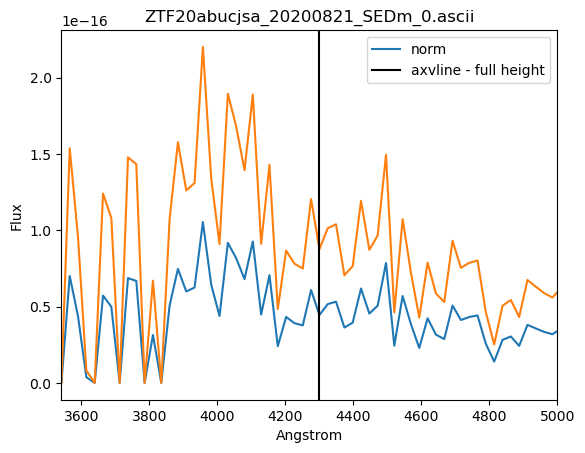

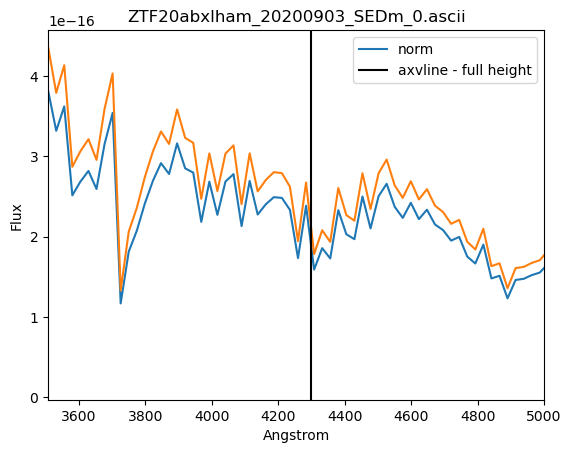

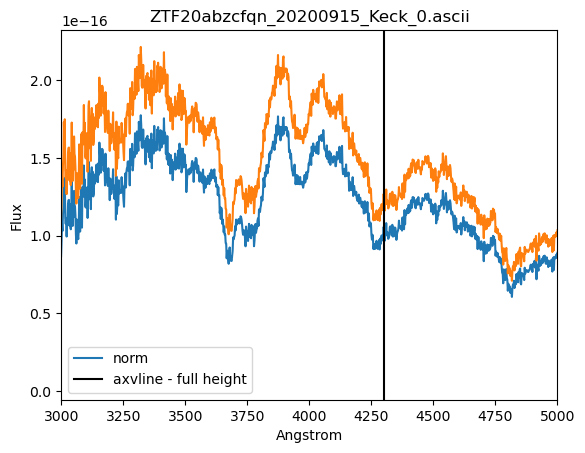

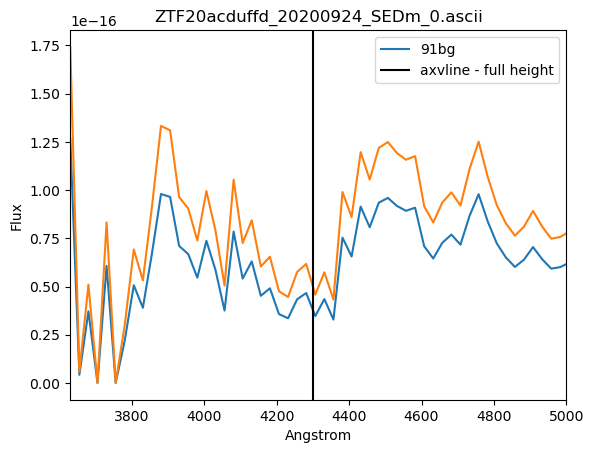

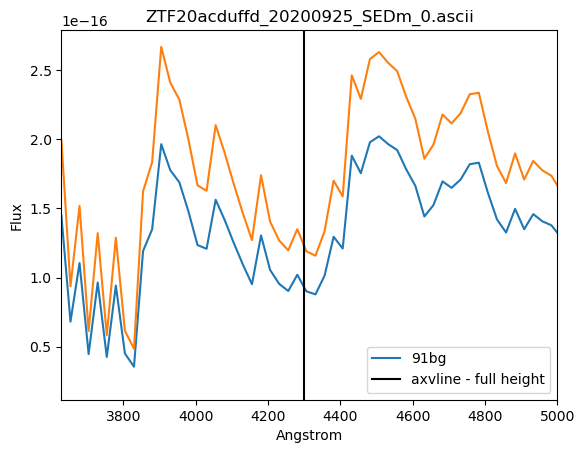

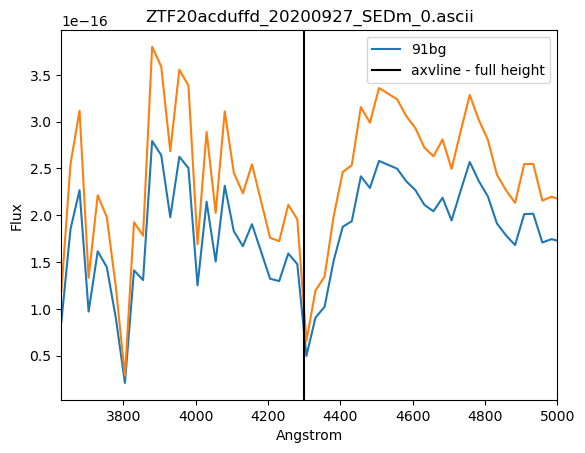

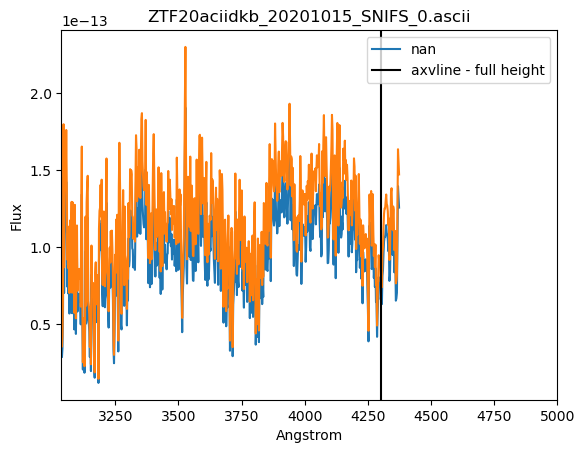

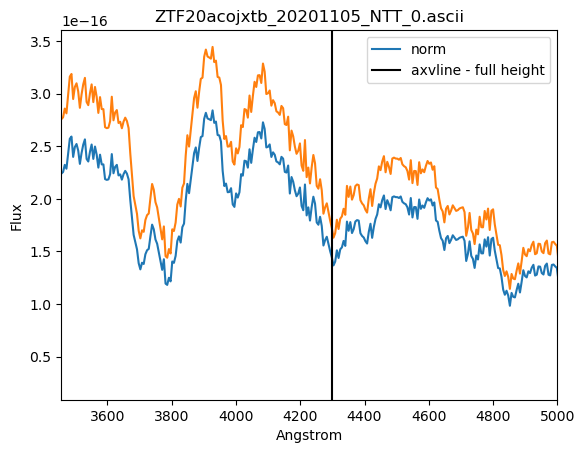

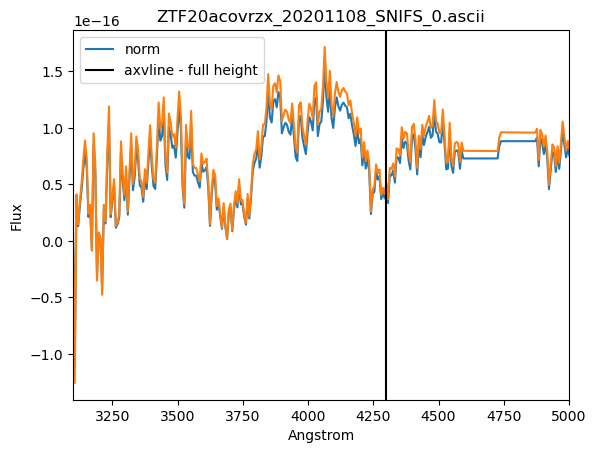

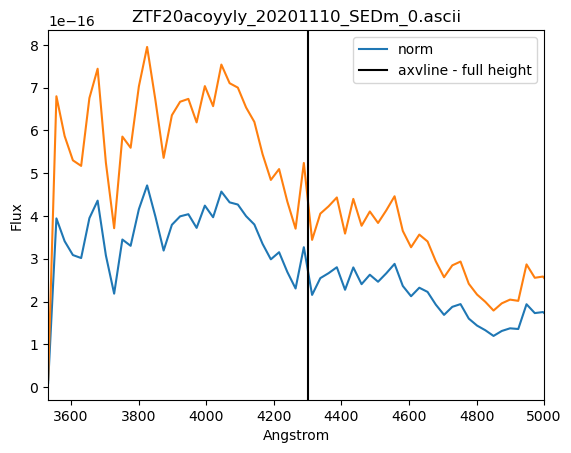

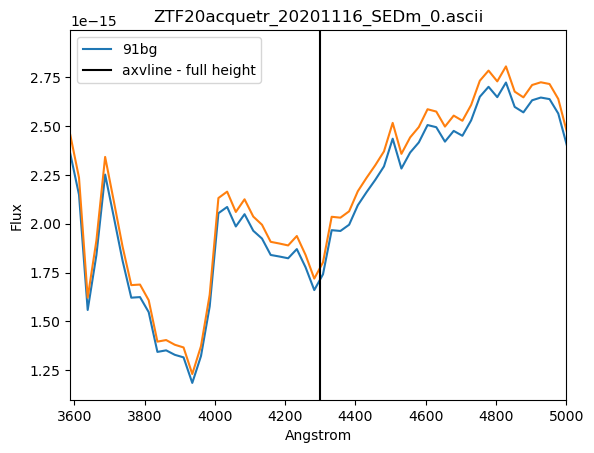

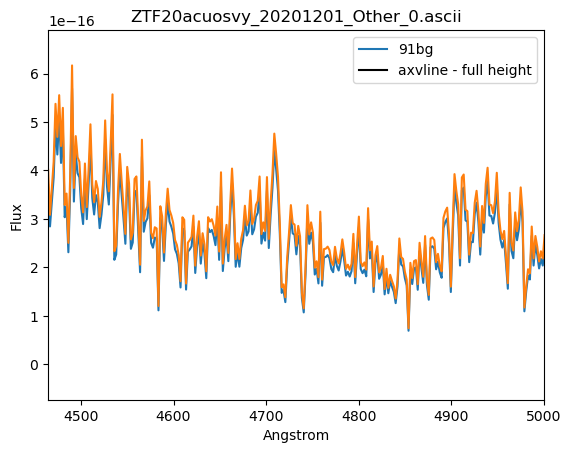

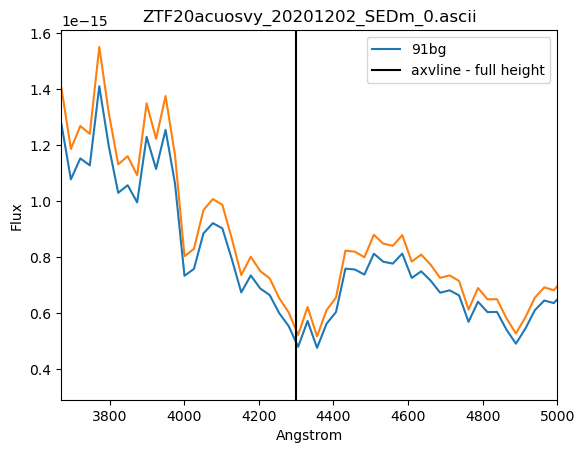

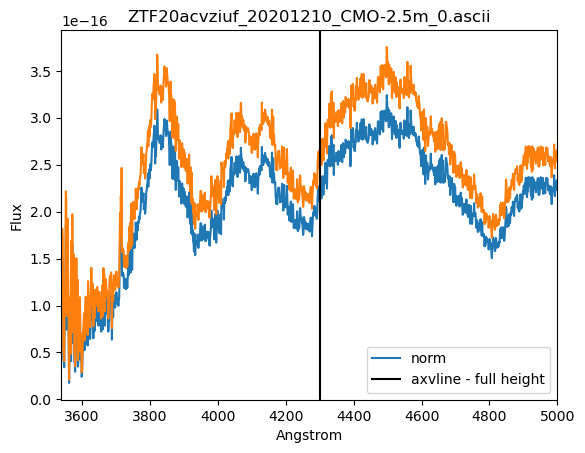

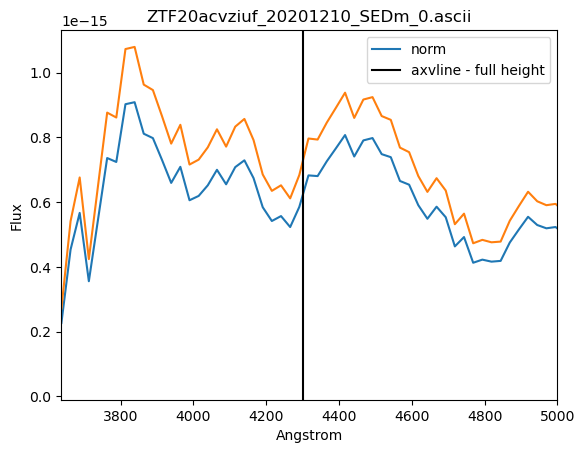

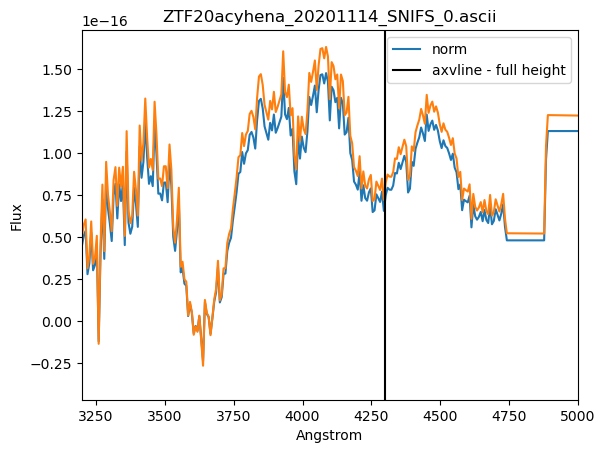

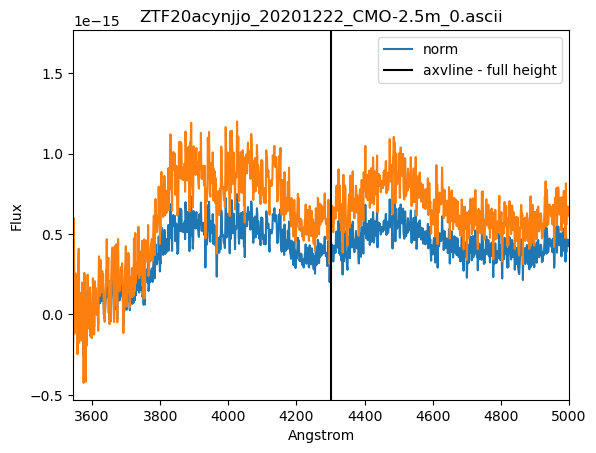

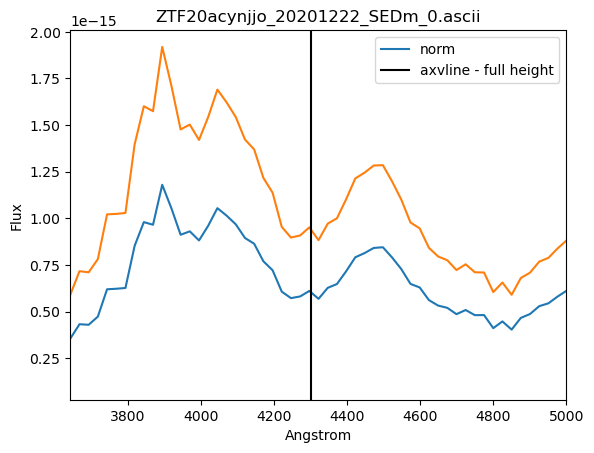

In [43]:
#%matplotlib widget
path_stem = r'C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\spectra'         #the first part of the path to call on each individual spectrum 
ahh = 'hello\goodbye'
slash = ahh[5]                  #i need the interim as the code would not recognise a string with jsut a slash for some reason '\'

figno = 1                       #just a easy way to segregate all the figures by increasing this by 1 in each loop

for file in range(len(filename_allcut)):
    
    spectrum = ascii.read(path_stem + slash + filename_allcut[file])    #adding each sting together to create the path name
    spectrum = np.array(spectrum)
    angstrom = []
    flux = []
    
    for i in range(len(spectrum)):
        angstrom.append(spectrum[i][0])         #picking out all the wavelength and flux data because they are arranged unhelpfully to begin with
        flux.append(spectrum[i][1])
    
    flux = np.array(flux)
    angstrom = np.array(angstrom)
    angstrom = angstrom/(1+z_allcut[file])      #correcting for the redshift 
    waveno = 1/(angstrom * 1e-4)                #wave number in inverse microns
    #A_v = 1
    #R_v = A_v / mwebv_allcut[file]
    R_v = 3.1
    A_v = R_v * mwebv_allcut[file]
    deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), flux)

    #%matplotlib widget
    plt.figure(figno)
    plt.title(filename_allcut[file])
    plt.xlabel("Angstrom")
    plt.ylabel("Flux")
    if min(angstrom) < 3000:
        plt.xlim(3000,5000)
    else:
        plt.xlim(min(angstrom),5000)
    plt.plot(angstrom,flux, label=sub_type_allcut[file])
    plt.plot(angstrom,deredden_flux)
    plt.axvline(x = 4300, color = 'k', label = 'axvline - full height')         #adding a vertical line around the Ti II feature we want to look at 
    plt.legend()
    figno += 1                                  #easy way to segregate figures

In [44]:
#This is a cell for plotting one individual specrtum

#angstrom = []
#flux = []
#file = 70
#spectrum = spectrum = ascii.read(path_stem + slash + filename_allcut[file])
#for i in range(len(spectrum)):
#        angstrom.append(spectrum[i][0])         #picking out all the wavelength and flux data because they are arranged unhelpfully to begin with
#        flux.append(spectrum[i][1])
#angstrom = np.array(angstrom)
#flux = np.array(flux)
#angstrom = angstrom/(1+z_allcut[file])      #correcting for the redshift 
#waveno = 1/(angstrom * 1e-4)                #wave number in inverse microns
#A_v = 1
#R_v = A_v / mwebv_allcut[file]
##apply(ccm89(waveno, A_v, R_v), flux)
#a = ccm89(waveno, A_v, R_v, unit='invum')
#deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), flux)
#plt.plot(angstrom,flux, label=sub_type_allcut[file])
#plt.plot(angstrom,deredden_flux)
#plt.axvline(x = 4300, color = 'k', label = 'axvline - full height')

The name of the file can and folder names can be changed to fit the purpose

In [45]:
path_stem = r'C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\spectra'         #the first part of the path to call on each individual spectrum 
ahh = 'hello\goodbye'
slash = ahh[5]                  #i need the interim as the code would not recognise a string with jsut a slash for some reason '\'

file_name = np.array(all_info_table_allcut_z_cut['File Name'])
dered_file_name = np.array(all_info_table_allcut_z_cut['Dereddened File Name'])
MWEBV_value = np.array(all_info_table_allcut_z_cut['MWEBV'])

for file in range(len(file_name)):
    
    if file_name[file] == 'ZTF20acquetr_20201116_P60_v1.ascii':
        spectrum = ascii.read(r"C:\Users\senan\OneDrive\Desktop\Capstone\ZTF20acquetr_stuff\ZTF20acquetr_20201116_P60_v1.ascii")
    elif file_name[file] != 'ZTF20acquetr_20201116_P60_v1.ascii':
        spectrum = ascii.read(path_stem + slash + file_name[file])    #adding each sting together to create the path name
    spectrum = np.array(spectrum)
    angstrom = []
    flux = []
    
    for i in range(len(spectrum)):
        angstrom.append(spectrum[i][0])         #picking out all the wavelength and flux data because they are arranged unhelpfully to begin with
        flux.append(spectrum[i][1])
    
    flux = np.array(flux)
    angstrom = np.array(angstrom)
    #angstrom = angstrom/(1+z_allcut[file])      #correcting for the redshift 
    waveno = 1/(angstrom * 1e-4)                #wave number in inverse microns
    #A_v = 1
    #R_v = A_v / mwebv_allcut[file]
    R_v = 3.1
    A_v = R_v * mwebv_allcut[file]
    deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), flux)

    wavel_flux = {'wl':angstrom, 'fl':deredden_flux}
    ChangeFileFormat = pd.DataFrame(wavel_flux)

    #filepath = r'C:\Users\senan\OneDrive\Desktop\Capstone\dereddened_spectra_and_Ti_figures' + slash + dered_file_name[file]
    #ChangeFileFormat.to_csv(filepath)

In [46]:
#this is just a proof of concept cell to see if saving the new files in a filder would work

#path_stem = r'C:\Users\senan\OneDrive\Desktop\Capstone\ztfcosmoidr\dr2\spectra'         #the first part of the path to call on each individual spectrum 
#ahh = 'hello\goodbye'
#slash = ahh[5]

#spectrum = ascii.read(path_stem + slash + all_info_table_allcut_z_cut['File Name'][0])    #adding each sting together to create the path name
#spectrum = np.array(spectrum)
#angstrom = []
#flux = []
#    
#for i in range(len(spectrum)):
#    angstrom.append(spectrum[i][0])         #picking out all the wavelength and flux data because they are arranged unhelpfully to begin with
#    flux.append(spectrum[i][1])
#    
#flux = np.array(flux)
#angstrom = np.array(angstrom)
##angstrom = angstrom/(1+z_allcut[file])      #correcting for the redshift 
#waveno = 1/(angstrom * 1e-4)                #wave number in inverse microns
#A_v = 1
#R_v = A_v / all_info_table_allcut_z_cut['MWEBV'][0]
#deredden_flux = remove(ccm89(waveno, A_v, R_v, unit='invum'), flux)

#wavel_flux = {'wl':angstrom, 'fl':flux}
#ChangeFileFormat = pd.DataFrame(wavel_flux)

#filepath = r'C:\Users\senan\OneDrive\Desktop\Capstone\dereddend_spectra' + slash + all_info_table_allcut_z_cut['Dereddened File Name'][0]
#ChangeFileFormat.to_csv(filepath)